In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pydeck as pdk
import folium
import scipy.stats as stats
import matplotlib.font_manager as fm
from matplotlib import rc 
import matplotlib as mp
import matplotlib.pyplot as plt
# %matplotlib inline
import re
fm._rebuild()
font_path = "C:/Users/gichan/AppData/Local/Microsoft/Windows/Fonts/12롯데마트드림BOLD.TTF"
font_path = "C:/Windows/Fonts/12롯데마트드림BOLD.TTF"
font = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.size'] = 13.0
# rc('font', family='Malgun Gothic')

# font = fm.FontProperties(fname=font_path).get_name()
rc('font', family='12LotteMartDreamBold')


Text(0.3, 0.3, '한글')

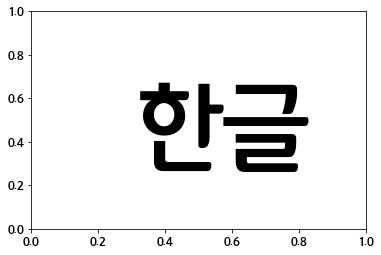

In [2]:
plt.text(0.3, 0.3, '한글', size=100)

In [3]:
# import matplotlib.font_manager as fm
# font_path = "C:/Users/gichan/AppData/Local/Microsoft/Windows/Fonts/12롯데마트드림BOLD.TTF"
# font = fm.FontProperties(fname=font_path).get_name()
# rc('font', family=font)


In [4]:
37600/24600
86600/55000

1.5745454545454545

In [5]:
# !pip install pydeck
# !pip install folium
# !pip install selenium

In [6]:
df_necessity = pd.read_csv('../datas/huge/df_necessities.csv', encoding='cp949')
df_sales = pd.read_csv('../datas/huge/df_sales_after.csv', encoding='cp949')
df_market_address = pd.read_csv('../datas/huge/df_market_add.csv', encoding='cp949')

In [7]:
df_necessity = df_necessity.drop(['Unnamed: 0'], axis=1)
df_sales = df_sales.drop(['Unnamed: 0'], axis=1)
df_market_address = df_market_address.drop(['Unnamed: 0'], axis=1)

In [8]:
df_necessity

일련번호  시장이름         품목이름      실판매규격  가격(원)     년도-월 자치구이름    년도  분기  \
0       1621162  통인시장   양파(1.5kg망)        1kg   2000  2020-12   종로구  2020   4   
1       1622882  통인시장   양파(1.5kg망)        1kg   2000  2020-12   종로구  2020   4   
2       1622883  통인시장     상추(100g)       400g   3000  2020-12   종로구  2020   4   
3       1622885  통인시장    호박(인큐베이터)         1개   1000  2020-12   종로구  2020   4   
4       1622886  통인시장  쇠고기(한우,불고기)    600g2등급  23000  2020-12   종로구  2020   4   
...         ...   ...          ...        ...    ...      ...   ...   ...  ..   
167727   449830  구로시장           달걀        10개   1500  2013-05   구로구  2013   2   
167728   449831  구로시장   조기(냉동,수입산)  1마리(20cm)   1500  2013-05   구로구  2013   2   
167729   449832  구로시장   명태(러시아,냉동)  1마리(42cm)   1700  2013-05   구로구  2013   2   
167730   449833  구로시장   오징어(생물,국산)        1마리   2500  2013-05   구로구  2013   2   
167731   449834  구로시장   고등어(생물,국산)  1마리(32cm)   2000  2013-05   구로구  2013   2   

           업종  
0         청과상  
1         청과상  
2         청과상  
3         청과상  
4        육류판매  
...       ...  
167727   육류판매  
167728  수산물판매  
167729  수산물판매  
167730  수산물판매  
167731  수산물판매  

[167732 rows x 10 columns]

In [9]:
df_sales

년도  분기      시장이름     업종   분기당_매출_금액  분기당_매출_건수  주중_매출_비율  주말_매출_비율  \
0       2020   2  번동북부골목시장    미용실    90507273       3387        59        41   
1       2020   2  번동북부골목시장    네일숍      521733         15       100         0   
2       2020   2  번동북부골목시장    세탁소    10754472        554        79        21   
3       2020   4    관악신사시장    의약품   271160578      24060        86        14   
4       2020   4    강남개포시장  치킨전문점    87505216       3448        68        32   
...      ...  ..       ...    ...         ...        ...       ...       ...   
133934  2014   4      신원시장   슈퍼마켓  1022592677      75285        68        32   
133935  2014   4   망원월드컵시장   인테리어    28056116        708        78        22   
133936  2014   4      서교시장   일반의류    24468933        510        60        40   
133937  2014   4   망원월드컵시장  수산물판매    83058093       3706        69        31   
133938  2014   4  화곡중앙골목시장    미용실    88764387       3052        59        42   

        월요일_매출_비율  화요일_매출_비율  ...  시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  \
0              14          9  ...               75      1862      1525   
1              33         33  ...                0         5        10   
2              15         19  ...               43       298       256   
3              22         15  ...                0     10719     13341   
4              11         11  ...             1098      1926      1308   
...           ...        ...  ...              ...       ...       ...   
133934         13         12  ...             6587     30087     40876   
133935         34          0  ...                0       247       404   
133936          9         10  ...               89       173       337   
133937          7         13  ...              298      1736      1921   
133938          8         12  ...              104      1567      1361   

        연령대_10_매출_건수  연령대_20_매출_건수  연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  \
0                 28           382           472          1082           983   
1                  0             5             5             0             5   
2                 21            86           192           106           149   
3                197          2771          4362          5964          5889   
4                195           438           348           937          1027   
...              ...           ...           ...           ...           ...   
133934           406         12114         20912         16968         11459   
133935             0            45           146           303           157   
133936            44           338            57            38            31   
133937             0           311           719          1408           482   
133938            76           569           788           958           419   

        연령대_60_이상_매출_건수  점포수  
0                   440    8  
1                     0    0  
2                     0    2  
3                  4877    4  
4                   291    2  
...                 ...  ...  
133934             9103    9  
133935                0    3  
133936                2    3  
133937              739    5  
133938              121   11  

[133939 rows x 76 columns]

In [10]:
df_market_address

시장이름         위도          경도
0              갈현시장  37.623587  126.917385
1              강남시장  37.518749  127.020640
2              강남시장  37.496746  126.953488
3         강남역 지하도상가  37.498595  127.028026
4    강남터미널지하도상점가1구역  37.500478  126.986060
..              ...        ...         ...
325        화양제일골목시장  37.543482  127.069252
326            회기시장  37.590936  127.054940
327         회현지하도상가  37.557286  126.979322
328            후암시장  37.550008  126.976553
329            도곡시장  37.497474  127.051622

[330 rows x 3 columns]

### 실판매 규격 통일

In [11]:
df_necessity[df_necessity['품목이름']=='조기(냉동,수입산)']

일련번호      시장이름        품목이름       실판매규격  가격(원)     년도-월 자치구이름    년도  \
9       1622891      통인시장  조기(냉동,수입산)         1마리   4000  2020-12   종로구  2020   
14      1626244      통인시장  조기(냉동,수입산)         1마리   4000  2020-12   종로구  2020   
19      1629973      통인시장  조기(냉동,수입산)         1마리   6000  2020-12   종로구  2020   
312     1623754  마포농수산물시장  조기(냉동,수입산)   1마리(200g)   3330  2020-12   마포구  2020   
353     1622908      광장시장  조기(냉동,수입산)         1마리   6000  2020-12   종로구  2020   
...         ...       ...         ...         ...    ...      ...   ...   ...   
167616   403725      신영시장  조기(냉동,수입산)   1마리(10cm)   2500  2013-01   양천구  2013   
167648   403789  공릉동도깨비시장  조기(냉동,수입산)   1마리(20cm)   4000  2013-01   노원구  2013   
167664   403837    돈암제일시장  조기(냉동,수입산)  1마리 (20cm)    666  2013-01   성북구  2013   
167712   749805      구로시장  조기(냉동,수입산)   1마리(20cm)   1500  2015-04   구로구  2015   
167728   449831      구로시장  조기(냉동,수입산)   1마리(20cm)   1500  2013-05   구로구  2013   

        분기     업종  
9        4  수산물판매  
14       4  수산물판매  
19       4  수산물판매  
312      4  수산물판매  
353      4  수산물판매  
...     ..    ...  
167616   1  수산물판매  
167648   1  수산물판매  
167664   1  수산물판매  
167712   2  수산물판매  
167728   2  수산물판매  

[5468 rows x 10 columns]

In [12]:
df_necessity[df_necessity['품목이름']=='오이(다다기)']

일련번호      시장이름     품목이름              실판매규격  가격(원)     년도-월 자치구이름  \
170     1627874    장위골목시장  오이(다다기)     1개 (2개 1,500원)    750  2020-12   성북구   
182     1631279    장위골목시장  오이(다다기)     1개 (2개 1,500원)    750  2020-12   성북구   
208     1623374    장위골목시장  오이(다다기)  1개 (1봉 2개 1,000원)    500  2020-12   성북구   
219     1625060    장위골목시장  오이(다다기)                1개     500  2020-12   성북구   
224     1629509    장위골목시장  오이(다다기)   1개 (2개 팩 1,500원)    750  2020-12   성북구   
...         ...       ...      ...                ...    ...      ...   ...   
167610   403719      신영시장  오이(다다기)                 1개    750  2013-01   양천구   
167626   403767    상계중앙시장  오이(다다기)                 1개    700  2013-01   노원구   
167642   403783  공릉동도깨비시장  오이(다다기)                 1개    600  2013-01   노원구   
167658   403831    돈암제일시장  오이(다다기)                 1개    833  2013-01   성북구   
167674   406471      마천시장  오이(다다기)                 1개    500  2013-01   송파구   

          년도  분기   업종  
170     2020   4  청과상  
182     2020   4  청과상  
208     2020   4  청과상  
219     2020   4  청과상  
224     2020   4  청과상  
...      ...  ..  ...  
167610  2013   1  청과상  
167626  2013   1  청과상  
167642  2013   1  청과상  
167658  2013   1  청과상  
167674  2013   1  청과상  

[8296 rows x 10 columns]

In [13]:
re_num = re.compile('([0-9.]+|한)([가-힣]+)')
re_size = re.compile('([0-9.,]+)([a-zA-Z]+)')

In [14]:
standards = set()
for pre_standard in df_necessity['실판매규격'].unique():
    num_m = re_num.search(pre_standard)
    size_m = re_size.search(pre_standard)
    print(pre_standard, end='/')
    if not num_m:
        print('no matched', end='/')
    else:
        amount, standard = num_m.group(1), num_m.group(2)
        print(amount, standard, end='/')
    if not size_m:
        print('no matched', end='/')
    else:
        amount, standard = size_m.group(1), size_m.group(2)
        print(amount, standard, end='/')
    print()

1kg/no matched/1 kg/
400g/no matched/400 g/
1개/1 개/no matched/
600g2등급/2 등급/600 g/
600g/no matched/600 g/
1마리(1200g)/1 마리/1200 g/
10개(600g)/10 개/600 g/
30개(1800g)/30 개/1800 g/
1마리/1 마리/no matched/
1포기(2,5kg)/1 포기/2,5 kg/
1마리(395g)/1 마리/395 g/
1마리(710g)/1 마리/710 g/
1포기(2.4kg)/1 포기/2.4 kg/
1개(1.4kg)/1 개/1.4 kg/
10개(520g)/10 개/520 g/
1마리(1kg)/1 마리/1 kg/
1개(340g)/1 개/340 g/
1개(210g)/1 개/210 g/
1망(900g)/1 망/900 g/
1마리(30g)/1 마리/30 g/
1개(285g)/1 개/285 g/
1개(791g)/1 개/791 g/
1마리(730g)/1 마리/730 g/
1마리(410g)/1 마리/410 g/
1개(287g)/1 개/287 g/
1개(300g)/1 개/300 g/
30개(2.04kg)/30 개/2.04 kg/
1마리(460g)/1 마리/460 g/
1개(800g)/1 개/800 g/
30개(1.8kg)/30 개/1.8 kg/
1포기(2.5kg)/1 포기/2.5 kg/
100g/no matched/100 g/
1마리(35g)/1 마리/35 g/
1마리((620g)/1 마리/620 g/
1마리(520g)/1 마리/520 g/
1개(786g)/1 개/786 g/
30개(2.041kg)/30 개/2.041 kg/
1개(345g)/1 개/345 g/
1마리(495g)/1 마리/495 g/
1마리(790g)/1 마리/790 g/
1개(289g)/1 개/289 g/
1마리(390g)/1 마리/390 g/
1마리(350g)/1 마리/350 g/
30개(2.01kg)/30 개/2.01 kg/
1마리(785g)/1 마리/785 g/
1개(298g)/1 개/29

1팩/1 팩/no matched/
1포기(3.2kg)/1 포기/3.2 kg/
1개(1.3kg)/1 개/1.3 kg/
1봉(1.15kg)/1 봉/1.15 kg/
1봉(1.5kg)/1 봉/1.5 kg/
1망(1.15kg)/1 망/1.15 kg/
1봉(200g)/1 봉/200 g/
1마리(1050g)/1 마리/1050 g/
1봉(1.2kg)/1 봉/1.2 kg/
1마리(248g)/1 마리/248 g/
1팩(450g)/1 팩/450 g/
1개(802g)/1 개/802 g/
1포기(4.65kg)/1 포기/4.65 kg/
1팩(480g)/1 팩/480 g/
1팩(420g)/1 팩/420 g/
1개 220g/1 개/220 g/
1봉(1.16kg)/1 봉/1.16 kg/
1봉(1.48kg)/1 봉/1.48 kg/
대란1830g/no matched/1830 g/
1포기(4.1kg)/1 포기/4.1 kg/
1마리(1130g)/1 마리/1130 g/
1봉(840g)/1 봉/840 g/
1봉(2200g)/1 봉/2200 g/
1포기(2750g)/1 포기/2750 g/
1팩(440g)/1 팩/440 g/
1망(1.4kg)/1 망/1.4 kg/
1팩(350g)/1 팩/350 g/
1개(611g)/1 개/611 g/
1망(1.55kg)/1 망/1.55 kg/
1팩(500g)/1 팩/500 g/
1팩(400g)/1 팩/400 g/
1개(840g)/1 개/840 g/
1개(2.6kg)/1 개/2.6 kg/
1팩(430g)/1 팩/430 g/
1개(810g)/1 개/810 g/
1팩(220g)/1 팩/220 g/
1마리(249g)/1 마리/249 g/
1마리(26cm)/1 마리/26 cm/
1마리(44cm)/1 마리/44 cm/
1마리(대) /1 마리/no matched/
1개(368g)/1 개/368 g/
1개(803g)/1 개/803 g/
1망(1kg)/1 망/1 kg/
1개(2083g)/1 개/2083 g/
280g/no matched/280 g/
1개(1569g)/1 개/1569 g/

1마리(357g)/1 마리/357 g/
1마리(286g)/1 마리/286 g/
1개 (500g)/1 개/500 g/
1봉(2.5kg)/1 봉/2.5 kg/
1마리(24.5)/1 마리/no matched/
1개(325g)/1 개/325 g/
1개(625g)/1 개/625 g/
1마리(328g)/1 마리/328 g/
4개(800g)/4 개/800 g/
1개(682g)/1 개/682 g/
1마리1200g/1 마리/1200 g/
2개510g/2 개/510 g/
1개 450g/1 개/450 g/
1마리(55g)/1 마리/55 g/
1개(400g))/1 개/400 g/
2개(342g)/2 개/342 g/
1개(1.45kg)/1 개/1.45 kg/
4개800g/4 개/800 g/
1포기1540g/1 포기/1540 g/
1마리(346g)/1 마리/346 g/
30개(1.89kg)/30 개/1.89 kg/
10개(630g)/10 개/630 g/
적상추400g/no matched/400 g/
1개(1986g)/1 개/1986 g/
1개(1752g)/1 개/1752 g/
3개650g/3 개/650 g/
1개(694g)/1 개/694 g/
3개(421g)/3 개/421 g/
1개 2.5kg/1 개/2.5 kg/
1마리(489g)/1 마리/489 g/
1마리(327g)/1 마리/327 g/
1개(794g) /1 개/794 g/
1마리 300g/1 마리/300 g/
1마리25cm이상/1 마리/25 cm/
1마리350g/1 마리/350 g/
1개(321g)/1 개/321 g/
30개(1450g)/30 개/1450 g/
1개(797g)/1 개/797 g/
1개(586g)/1 개/586 g/
3개(611g)/3 개/611 g/
1마리(100g)/1 마리/100 g/
2개(426g)/2 개/426 g/
1개(627g)/1 개/627 g/
1개(312g)/1 개/312 g/
1개(618g)/1 개/618 g/
1개(1806kg)/1 개/1806 kg/
3개(624g)/3 개/624 g/
1개(

1마리 1.1kg/1 마리/1.1 kg/
1개 440g/1 개/440 g/
3개 (팩)/3 개/no matched/
1포기 (팩) 650g/1 포기/650 g/
1개  (340g)/1 개/340 g/
220g /no matched/220 g/
1개 340g/1 개/340 g/
30ro(2.04kg)/no matched/30 ro/
1망((1.5kg)/1 망/1.5 kg/
1봉지 200g/1 봉지/200 g/
1망 소/1 망/no matched/
1개 (670g)/1 개/670 g/
1개 (3개-3,500원)/1 개/no matched/
1130g/no matched/1130 g/
1포기 (650g)/1 포기/650 g/
5개 (망)/5 개/no matched/
100g (200g-2,000원)/000 원/100 g/
1개(1,870kg)/1 개/1,870 kg/
1개 (1500g)/1 개/1500 g/
1망 5개(1.3kg)/1 망/1.3 kg/
1개 (700g)/1 개/700 g/
4마리/4 마리/no matched/
1개  1970g/1 개/1970 g/
1마리250g/1 마리/250 g/
1마리1.4kg/1 마리/1.4 kg/
1망(대)/1 망/no matched/
1개(236g)/1 개/236 g/
1마리1.6kg/1 마리/1.6 kg/
1마리(300g/1 마리/300 g/
작은망/no matched/no matched/
1개(268g)/1 개/268 g/
1,5kg/no matched/1,5 kg/
1마리;/1 마리/no matched/
30r개(1800g)/no matched/30 r/
1개(1764g)/1 개/1764 g/
1망(소)/1 망/no matched/
1개(274g)/1 개/274 g/
1개(282g)/1 개/282 g/
1개(638g)/1 개/638 g/
1개(580g)/1 개/580 g/
1망(2.1kg)/1 망/2.1 kg/
1마리 600g/1 마리/600 g/
1마리 310g/1 마리/310 g/
30개 1.5kg/30 개/1.5

1마리(1.15kg)/1 마리/1.15 kg/
1마리(1.15gk)/1 마리/1.15 gk/
1마리 (39cm) /1 마리/39 cm/
1마리(18cm-몸통만/1 마리/18 cm/
1마리1.5kg/1 마리/1.5 kg/
1봉지(180g)/1 봉지/180 g/
1근 600g (1++)/1 근/600 g/
1통(1.4kg)/1 통/1.4 kg/
1마리(18/1 마리/no matched/
1마리(30cm) /1 마리/30 cm/
782g/no matched/782 g/
1마리15cm /1 마리/15 cm/
795g/no matched/795 g/
600g(2등급)/2 등급/600 g/
600f/no matched/600 f/
1마ㅇ리 1,2k /1 마/1,2 k/
793g/no matched/793 g/
291g/no matched/291 g/
600g 1근/1 근/600 g/
792g/no matched/792 g/
1RO/no matched/1 RO/
2kg/no matched/2 kg/
1마리(18cm-몸통먼만/1 마리/18 cm/
10개대란)/10 개대란/no matched/
282g/no matched/282 g/
295g/no matched/295 g/
786g/no matched/786 g/
238g/no matched/238 g/
1마리(18cm-몸통먼/1 마리/18 cm/
1망 1000/1 망/no matched/
1근 600g (00/1 근/600 g/
1rm,00g 1/no matched/1 rm/
1마리 20CM/1 마리/20 CM/
1마리 335cm/1 마리/335 cm/
1근 600g 1(1+)/1 근/600 g/
1개1/1 개/no matched/
300/no matched/no matched/
1마리 30.cm /1 마리/30. cm/
150g/no matched/150 g/
1마리 30CM  /1 마리/30 CM/
1망  1,5k/1 망/1,5 k/
100G /no matched/100 G/
1망 1,5K/1 망/1,5 K/
1마ㅣㄹ 

1마리(47cm)/1 마리/47 cm/
1개(672g)/1 개/672 g/
10개(65g)/10 개/65 g/
144g /no matched/144 g/
1마리 800g/1 마리/800 g/
1개(292g)/1 개/292 g/
1개(273g)/1 개/273 g/
1마리(42cm)꼬리까지/1 마리/42 cm/
1마리(중31cm)/1 마리/31 cm/
1마리(17cm)꼬리까지/1 마리/17 cm/
1개(771g)/1 개/771 g/
1개(775g)/1 개/775 g/
1마리(38m)/1 마리/38 m/
1마리(33cm)꼬리까지/1 마리/33 cm/
1마리(37cm)다리까지/1 마리/37 cm/
1마리(1,450g)/1 마리/1,450 g/
1개(772g)/1 개/772 g/
1마리(37cm)꼬리까지/1 마리/37 cm/
1마리(22cm)꼬리까지/1 마리/22 cm/
1마리(25cm)꼬리까지/1 마리/25 cm/
1.2Kg /no matched/1.2 Kg/
1마리15cm)/1 마리/15 cm/
1마리(29cm)꼬리까지/1 마리/29 cm/
1마리15cm/1 마리/15 cm/
1마리 (1300g)/1 마리/1300 g/
1개(749g)/1 개/749 g/
1개(853g)/1 개/853 g/
1마리(34cm)꼬리까지/1 마리/34 cm/
1마리(32m)꼬리까지/1 마리/32 m/
1마리(31cm)꼬리까지/1 마리/31 cm/
1개(605g)/1 개/605 g/
1000g /no matched/1000 g/
1,000g 1마리/1 마리/1,000 g/
1마리40cm/1 마리/40 cm/
1마리(33cm)다리까지/1 마리/33 cm/
1마리(22m)/1 마리/22 m/
1개(726g)/1 개/726 g/
1개(271g)/1 개/271 g/
1000k/no matched/1000 k/
1마리(23m)/1 마리/23 m/
1마리(34cm)다리까지/1 마리/34 cm/
1개(253g)/1 개/253 g/
1개(714g)/1 개/714 g/
다다기/no matched/no ma

### 생필품 가격과 매출과의 관계
- 다른 시장에서의 생필품 가격, 매출
    - 빈도수가 높은 품목 몇 가지에 대해서 그래프 여러개
    - 평균내서 그래프 한 개
- 시간별 생필품 가격, 매출
    - 다양한 시간대 정보가 있는 시장 몇 군데에 대해 빈도수가 높은 품목 몇 가지에 대해서 그래프 여러개

In [15]:
df_necessity.groupby(['품목이름']).count()[['가격(원)']].sort_values(['가격(원)'], ascending=False)

가격(원)
품목이름               
오이(다다기)        8296
쇠고기(한우,불고기)    7787
배추(2.5~3kg)    7627
달걀(10개)        7336
달걀(30개)        7331
...             ...
쇠고기(등심)           7
사과(부사),중급(중)      6
명태(냉동,국산)         5
갈치(생물, 국산)        1
갈치(냉동,국산)         1

[89 rows x 1 columns]

In [16]:
df_necessity.groupby(['품목이름', '시장이름', '실판매규격']).count()[['가격(원)']].sort_values(['가격(원)'], ascending=False)

가격(원)
품목이름        시장이름    실판매규격           
돼지고기(생삼겹살)  화곡본동시장  600g         213
상추(100g)    송화골목시장  100g         213
배추(2.5~3kg) 노룬산골목시장 1포기          212
돼지고기(생삼겹살)  노룬산골목시장 600g         212
상추(100g)    화곡본동시장  100g         212
...                              ...
명태          신창시장    1마리(810g)      1
쇠고기(한우1등급)  후암시장    600g 1+        1
명태          신창시장    1마리(800g)      1
                    1마리(799g)      1
갈치(냉동,국산)   망원시장    1마리(30cm)      1

[8981 rows x 1 columns]

In [17]:
df_necessity[df_necessity['품목이름']=='돼지고기(생삼겹살)'].groupby(['품목이름', '시장이름', '실판매규격']).count()[['가격(원)']].sort_values(['가격(원)'], ascending=False)

가격(원)
품목이름       시장이름    실판매규격           
돼지고기(생삼겹살) 화곡본동시장  600g         213
           노룬산골목시장 600g         212
           관악신사시장  600g         210
           송화골목시장  600g         210
           통인시장    600g         209
...                             ...
           송화골목시장  600g(1등급)      1
           수유전통시장  600            1
                   600            1
           숭인시장    600            1
           후암시장    600g           1

[105 rows x 1 columns]

In [18]:
df_necessity

일련번호  시장이름         품목이름      실판매규격  가격(원)     년도-월 자치구이름    년도  분기  \
0       1621162  통인시장   양파(1.5kg망)        1kg   2000  2020-12   종로구  2020   4   
1       1622882  통인시장   양파(1.5kg망)        1kg   2000  2020-12   종로구  2020   4   
2       1622883  통인시장     상추(100g)       400g   3000  2020-12   종로구  2020   4   
3       1622885  통인시장    호박(인큐베이터)         1개   1000  2020-12   종로구  2020   4   
4       1622886  통인시장  쇠고기(한우,불고기)    600g2등급  23000  2020-12   종로구  2020   4   
...         ...   ...          ...        ...    ...      ...   ...   ...  ..   
167727   449830  구로시장           달걀        10개   1500  2013-05   구로구  2013   2   
167728   449831  구로시장   조기(냉동,수입산)  1마리(20cm)   1500  2013-05   구로구  2013   2   
167729   449832  구로시장   명태(러시아,냉동)  1마리(42cm)   1700  2013-05   구로구  2013   2   
167730   449833  구로시장   오징어(생물,국산)        1마리   2500  2013-05   구로구  2013   2   
167731   449834  구로시장   고등어(생물,국산)  1마리(32cm)   2000  2013-05   구로구  2013   2   

           업종  
0         청과상  
1         청과상  
2         청과상  
3         청과상  
4        육류판매  
...       ...  
167727   육류판매  
167728  수산물판매  
167729  수산물판매  
167730  수산물판매  
167731  수산물판매  

[167732 rows x 10 columns]

### 상대가격 구하기

In [19]:
df_necessity_integrate = df_necessity.groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['가격(원)']].mean().reset_index()

In [20]:
df_necessity.sort_values(['가격(원)'], ascending=False)

일련번호     시장이름         품목이름      실판매규격   가격(원)     년도-월 자치구이름    년도  \
134196   953937   송화골목시장  배추(2.5~3kg)        1포기  750000  2016-08   강서구  2016   
16896   1602645     용문시장   오징어(냉동,국산)   1마리 45cm  310000  2020-10   용산구  2020   
162327   495013   청담삼익시장   돼지고기(생삼겹살)      600g   154880  2013-08   강남구  2013   
144580   793032  노룬산골목시장   돼지고기(생삼겹살)       600g  135000  2015-07   광진구  2015   
148830   714401     대조시장    돼지고기(삼겹살)       600g  111400  2015-01   은평구  2015   
...         ...      ...          ...        ...     ...      ...   ...   ...   
49883   1520872   돈암제일시장      달걀(10개)       10개        0  2020-02   성북구  2020   
50639   1507231     후암시장   조기(생물,수입산)  1마리 20cm        0  2020-01   용산구  2020   
51495   1507268     용문시장   고등어(생물,국산)  1마리 35cm        0  2020-01   용산구  2020   
51717   1510649     용문시장   고등어(생물,국산)  1마리 35cm        0  2020-01   용산구  2020   
110834  1360049   청담삼익시장           조기       1 마리       0  2019-01   강남구  2019   

        분기     업종  
134196   3    청과상  
16896    4  수산물판매  
162327   3   육류판매  
144580   3   육류판매  
148830   1   육류판매  
...     ..    ...  
49883    1   육류판매  
50639    1  수산물판매  
51495    1  수산물판매  
51717    1  수산물판매  
110834   1  수산물판매  

[167732 rows x 10 columns]

In [21]:
df_necessity_per_time = df_necessity_integrate.groupby(['년도', '분기', '품목이름', '실판매규격']).quantile(0.75).reset_index().rename(columns={'가격(원)': 'q3'})

In [22]:
df_necessity_per_time = df_necessity_per_time.merge(df_necessity_integrate.groupby(['년도', '분기', '품목이름', '실판매규격']).quantile(0.25).reset_index().rename(columns={'가격(원)': 'q1'}))

In [23]:
df_necessity_per_time

년도  분기          품목이름       실판매규격           q3           q1
0      2013   1           고등어  1마리 (30cm)  2500.000000  2500.000000
1      2013   1  고등어(30cm,국산)         1마리  3666.666667  3666.666667
2      2013   1  고등어(30cm,국산)  1마리 (30cm)  2708.333333  2125.000000
3      2013   1    고등어(냉동,국산)         1마리  3750.000000  3125.000000
4      2013   1    고등어(냉동,국산)   1마리(25cm)  2333.333333  2333.333333
...     ...  ..           ...         ...          ...          ...
13912  2020   4     호박(인큐베이터)       1개(대)  1500.000000  1500.000000
13913  2020   4     호박(인큐베이터)     1개394g)  1000.000000  1000.000000
13914  2020   4     호박(인큐베이터)   1마리(340g)  1166.666667  1166.666667
13915  2020   4     호박(인큐베이터)        370g  1000.000000  1000.000000
13916  2020   4  호박(인큐베이터),중간          1개  1199.456522  1180.978261

[13917 rows x 6 columns]

In [24]:
# q3 + (1.5 * iqr)
df_necessity_per_time['low_bound'] = df_necessity_per_time['q1'] - 1.5 * (df_necessity_per_time['q3'] - df_necessity_per_time['q1'])
df_necessity_per_time['high_bound'] = df_necessity_per_time['q3'] + 1.5 * (df_necessity_per_time['q3'] - df_necessity_per_time['q1'])

In [25]:
df_necessity_per_time[df_necessity_per_time['품목이름']=='고등어(30cm,국산)']

년도  분기          품목이름       실판매규격           q3           q1  \
1      2013   1  고등어(30cm,국산)         1마리  3666.666667  3666.666667   
2      2013   1  고등어(30cm,국산)  1마리 (30cm)  2708.333333  2125.000000   
280    2013   2  고등어(30cm,국산)         1마리  4187.500000  4062.500000   
281    2013   2  고등어(30cm,국산)        1마리   1000.000000  1000.000000   
282    2013   2  고등어(30cm,국산)  1마리 (25cm)  2000.000000  2000.000000   
...     ...  ..           ...         ...          ...          ...   
8770   2019   3  고등어(30cm,국산)        1마리0  3000.000000  3000.000000   
9406   2019   4  고등어(30cm,국산)         1마라  2500.000000  2500.000000   
9407   2019   4  고등어(30cm,국산)         1마리  2932.291667  2796.875000   
10009  2020   1  고등어(30cm,국산)         1마리  3541.666667  3180.555556   
10429  2020   2  고등어(30cm,국산)         1마리  3257.352941  2419.117647   

         low_bound   high_bound  
1      3666.666667  3666.666667  
2      1250.000000  3583.333333  
280    3875.000000  4375.000000  
281    1000.000000  1000.000000  
282    2000.000000  2000.000000  
...            ...          ...  
8770   3000.000000  3000.000000  
9406   2500.000000  2500.000000  
9407   2593.750000  3135.416667  
10009  2638.888889  4083.333333  
10429  1161.764706  4514.705882  

[91 rows x 8 columns]

In [26]:
df_necessity_integrate

품목이름    시장이름      실판매규격     업종    년도  분기        가격(원)
0         갈치(냉동,국산)    망원시장  1마리(30cm)  수산물판매  2015   2  3800.000000
1        갈치(생물, 국산)  송화골목시장  1마리(27cm)  수산물판매  2018   2  3000.000000
2               고등어  고척근린시장   1마리 300g  수산물판매  2020   4  3000.000000
3               고등어  고척근린시장  1마리(300g)  수산물판매  2020   4  2833.333333
4               고등어  고척근린시장  1마리(400g)  수산물판매  2020   3  3000.000000
...             ...     ...        ...    ...   ...  ..          ...
37007  호박(인큐베이터),중간  우림골목시장         1개    청과상  2014   1  1500.000000
37008  호박(인큐베이터),중간  우림골목시장         1개    청과상  2014   2   750.000000
37009  호박(인큐베이터),중간  우림골목시장         1개    청과상  2014   3   833.333333
37010  호박(인큐베이터),중간  우림골목시장         1개    청과상  2014   4  1033.333333
37011  호박(인큐베이터),중간  우림골목시장         1개    청과상  2015   1  1500.000000

[37012 rows x 7 columns]

In [27]:
df_necessity_final = df_necessity_per_time.merge(df_necessity_integrate)

In [28]:
df_necessity_final = df_necessity_final[(df_necessity_final['가격(원)']>=df_necessity_final['low_bound'])&(df_necessity_final['가격(원)']<=df_necessity_final['high_bound'])]

In [29]:
df_necessity_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35958 entries, 0 to 37011
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   년도          35958 non-null  int64  
 1   분기          35958 non-null  int64  
 2   품목이름        35958 non-null  object 
 3   실판매규격       35958 non-null  object 
 4   q3          35958 non-null  float64
 5   q1          35958 non-null  float64
 6   low_bound   35958 non-null  float64
 7   high_bound  35958 non-null  float64
 8   시장이름        35958 non-null  object 
 9   업종          35958 non-null  object 
 10  가격(원)       35958 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 3.3+ MB


In [30]:
df_necessity_final

년도  분기          품목이름       실판매규격           q3           q1  \
0      2013   1           고등어  1마리 (30cm)  2500.000000  2500.000000   
1      2013   1  고등어(30cm,국산)         1마리  3666.666667  3666.666667   
2      2013   1  고등어(30cm,국산)  1마리 (30cm)  2708.333333  2125.000000   
3      2013   1  고등어(30cm,국산)  1마리 (30cm)  2708.333333  2125.000000   
4      2013   1    고등어(냉동,국산)         1마리  3750.000000  3125.000000   
...     ...  ..           ...         ...          ...          ...   
37007  2020   4     호박(인큐베이터)     1개394g)  1000.000000  1000.000000   
37008  2020   4     호박(인큐베이터)   1마리(340g)  1166.666667  1166.666667   
37009  2020   4     호박(인큐베이터)        370g  1000.000000  1000.000000   
37010  2020   4  호박(인큐베이터),중간          1개  1199.456522  1180.978261   
37011  2020   4  호박(인큐베이터),중간          1개  1199.456522  1180.978261   

         low_bound   high_bound    시장이름     업종        가격(원)  
0      2500.000000  2500.000000  돈암제일시장  수산물판매  2500.000000  
1      3666.666667  3666.666667    금남시장  수산물판매  3666.666667  
2      1250.000000  3583.333333  돈암제일시장  수산물판매  3000.000000  
3      1250.000000  3583.333333  장위골목시장  수산물판매  1833.333333  
4      2187.500000  4687.500000    도곡시장  수산물판매  3250.000000  
...            ...          ...     ...    ...          ...  
37007  1000.000000  1000.000000  관악신사시장    청과상  1000.000000  
37008  1166.666667  1166.666667    통인시장    청과상  1166.666667  
37009  1000.000000  1000.000000    숭인시장    청과상  1000.000000  
37010  1153.260870  1227.173913   남대문시장    청과상  1208.695652  
37011  1153.260870  1227.173913  서울중앙시장    청과상  1171.739130  

[35958 rows x 11 columns]

In [31]:
df_necessity_final = df_necessity_final.merge(df_necessity_final.groupby(['년도', '분기', '품목이름', '실판매규격']).mean()[['가격(원)']].reset_index().rename(columns={'가격(원)': '시세'}))

In [32]:
df_necessity_final['상대가격'] = df_necessity_final['가격(원)'] - df_necessity_final['시세']

In [33]:
df_necessity_final.groupby(['년도', '분기', '품목이름']).max()[['상대가격']].sort_values('상대가격', ascending=False)

상대가격
년도   분기 품목이름                     
2020 3  쇠고기          10533.333333
2015 4  쇠고기(한우1등급)   10333.333333
2017 2  쇠고기(한우,불고기)  10070.833333
2018 2  쇠고기(한우,불고기)   9725.827957
     3  쇠고기(한우,불고기)   9437.288889
...                           ...
2016 4  명태(냉동,국산)        0.000000
        무(세척무, 중)        0.000000
        배                0.000000
        배(신고),중급(중)      0.000000
2013 1  고등어              0.000000

[2170 rows x 1 columns]

In [34]:
df_necessity_final.sort_values(['상대가격'], ascending=False)

년도  분기         품목이름      실판매규격            q3       q1  low_bound  \
31944  2020   3          쇠고기       600g  31500.000000  24800.0    14750.0   
10129  2015   4   쇠고기(한우1등급)       600g  27700.000000  19900.0     8200.0   
15409  2017   2  쇠고기(한우,불고기)       600g  28425.000000  22000.0    12362.5   
19572  2018   2  쇠고기(한우,불고기)       600g  29000.000000  24000.0    16500.0   
20725  2018   3  쇠고기(한우,불고기)       600g  29000.000000  24000.0    16500.0   
...     ...  ..          ...        ...           ...      ...        ...   
12683  2016   3  쇠고기(한우,불고기)  600g(1등급)  27666.666667  23700.0    17750.0   
15431  2017   2   쇠고기(한우1등급)       600g  27455.000000  22350.0    14692.5   
19558  2018   2  쇠고기(한우,불고기)       600g  29000.000000  24000.0    16500.0   
28606  2020   1  쇠고기(한우,불고기)       600g  28666.666667  24000.0    17000.0   
27281  2019   4  쇠고기(한우,불고기)       600g  28625.000000  24016.0    17102.5   

         high_bound      시장이름    업종         가격(원)            시세          상대가격  
31944  41550.000000   영등포전통시장  육류판매  40800.000000  30266.666667  10533.333333  
10129  39400.000000    우림골목시장  육류판매  35400.000000  25066.666667  10333.333333  
15409  38062.500000    청담삼익시장  육류판매  35880.000000  25809.166667  10070.833333  
19572  36500.000000    청담삼익시장  육류판매  35880.000000  26154.172043   9725.827957  
20725  36500.000000    청담삼익시장  육류판매  35880.000000  26442.711111   9437.288889  
...             ...       ...   ...           ...           ...           ...  
12683  33616.666667      방이시장  육류판매  18000.000000  25286.666667  -7286.666667  
15431  35112.500000   둔촌역전통시장  육류판매  18000.000000  25401.666667  -7401.666667  
19558  36500.000000      사당시장  육류판매  18000.000000  26154.172043  -8154.172043  
28606  35666.666667  공릉동도깨비시장  육류판매  17333.333333  26225.071098  -8891.737765  
27281  35538.500000  공릉동도깨비시장  육류판매  17165.217391  26128.925514  -8963.708122  

[35958 rows x 13 columns]

### 2020년 포함 산점도 그리기

In [145]:
# item_names의 결과에 업종을 수작업으로 매핑
# category = ['수산물판매', '육류판매', '미곡판매', '청과상']
item_to_category = {
    '애호박': '청과상', 
    '오징어': '수산물판매', 
    '상추': '청과상', 
    '사과': '청과상', 
    '오이': '청과상', 
    '달걀': '육류판매', 
    '돼지고기': '육류판매', 
    '냉동참조기': '수산물판매', 
    '양파': '청과상', 
    '조기': '수산물판매', 
    '동태': '수산물판매', 
    '호박': '청과상', 
    '쇠고기': '육류판매', 
    '고등어': '수산물판매', 
    '닭고기': '육류판매', 
    '명태': '수산물판매', 
    '무': '청과상', 
    '배': '청과상', 
    '배추': '청과상',
    '삼겹살': '육류판매',
    '갈치': '수산물판매',
}
def get_sales_by_relative_itemprice(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity_final['품목이름']==item
    if market:
        condition &= df_necessity_final['시장이름']==market
    if standard:
        condition &= df_necessity_final['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity_final[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['상대가격']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '상대가격', sales_on]]
    
#     print(stats.pearsonr(df_sales_by_itemprice['상대가격'], df_sales_by_itemprice[sales_on]))
    fig = px.scatter(x=df_sales_by_itemprice['상대가격'], y=df_sales_by_itemprice[sales_on])
    fig.show()
    
def get_sales_by_relative_itemprice_corr(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity_final['품목이름']==item
    if market:
        condition &= df_necessity_final['시장이름']==market
    if standard:
        condition &= df_necessity_final['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity_final[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['상대가격']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '상대가격', sales_on]]
    
    if len(df_sales_by_itemprice['상대가격']) >= 10:
        return stats.pearsonr(df_sales_by_itemprice['상대가격'], df_sales_by_itemprice[sales_on])
    else:
        return None
    
def get_sales_by_relative_itemprice_df(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity_final['품목이름']==item
    if market:
        condition &= df_necessity_final['시장이름']==market
    if standard:
        condition &= df_necessity_final['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity_final[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['상대가격']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '상대가격', sales_on, '년도', '분기']]
    
    return df_sales_by_itemprice
    

In [41]:
get_sales_by_relative_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)', standard='600g')

(0.10701967536748404, 0.010911851650525346)


In [43]:
get_sales_by_relative_itemprice('분기당_매출_금액', '오이(다다기)','대림중앙시장','1개')

(-0.08641632898582527, 0.6746650186062447)


In [157]:
get_sales_by_relative_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)','방학동도깨비시장','600g')
get_sales_by_relative_itemprice_df('분기당_매출_금액', '쇠고기(한우,불고기)','방학동도깨비시장','600g')

시장이름    업종         상대가격   분기당_매출_금액    년도  분기
0   방학동도깨비시장  육류판매 -1124.047619  2334127853  2018   1
1   방학동도깨비시장  육류판매 -1354.838710  1668339501  2018   2
2   방학동도깨비시장  육류판매 -1644.711111  2246237624  2018   3
3   방학동도깨비시장  육류판매 -1397.011494  2060634009  2018   4
4   방학동도깨비시장  육류판매 -1274.761905  1457509354  2019   1
5   방학동도깨비시장  육류판매 -2427.670211   958847610  2019   2
6   방학동도깨비시장  육류판매 -1678.493983  1583127107  2019   3
7   방학동도깨비시장  육류판매   363.382179  3548133750  2019   4
8   방학동도깨비시장  육류판매  1574.928902  4740536876  2020   1
9   방학동도깨비시장  육류판매  2420.080164  4533511762  2020   2
10  방학동도깨비시장  육류판매  1698.084900  4914708719  2020   3

In [158]:
get_sales_by_relative_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)','대림시장','600g')
get_sales_by_relative_itemprice_df('분기당_매출_금액', '쇠고기(한우,불고기)','대림시장','600g')

시장이름    업종         상대가격   분기당_매출_금액    년도  분기
0  대림시장  육류판매 -5154.172043  2028166555  2018   2
1  대림시장  육류판매 -5442.711111  2629731058  2018   3
2  대림시장  육류판매 -4697.011494  2112574688  2018   4
3  대림시장  육류판매 -3641.428571  2297885824  2019   1
4  대림시장  육류판매 -4044.336878  1576434493  2019   2
5  대림시장  육류판매 -4203.493983  1918059304  2019   3
6  대림시장  육류판매 -2168.925514  1924484669  2019   4
7  대림시장  육류판매 -2225.071098  2595708314  2020   1
8  대림시장  육류판매 -2768.491264  2100748099  2020   2
9  대림시장  육류판매 -4101.915100  2707591577  2020   3

In [159]:
get_sales_by_relative_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)','청량리종합시장','600g')
get_sales_by_relative_itemprice_df('분기당_매출_금액', '쇠고기(한우,불고기)','청량리종합시장','600g')

시장이름    업종         상대가격   분기당_매출_금액    년도  분기
0   청량리종합시장  육류판매  1075.952381  1788138717  2018   1
1   청량리종합시장  육류판매  1512.494624  1315212168  2018   2
2   청량리종합시장  육류판매  1557.288889  1937035372  2018   3
3   청량리종합시장  육류판매  1802.988506  1673932487  2018   4
4   청량리종합시장  육류판매  1258.571429  1942420791  2019   1
5   청량리종합시장  육류판매  2066.447436  1258225028  2019   2
6   청량리종합시장  육류판매  1979.839350  1753322564  2019   3
7   청량리종합시장  육류판매  2871.074486  1687117943  2019   4
8   청량리종합시장  육류판매  2997.151124  2414374239  2020   1
9   청량리종합시장  육류판매  5541.508736  2171737979  2020   2
10  청량리종합시장  육류판매  4662.790782  2845904178  2020   3
11  청량리종합시장  육류판매  5295.226697  2134036615  2020   4

In [160]:
get_sales_by_relative_itemprice('분기당_매출_금액', '무(1kg)','관악신사시장','1개')
get_sales_by_relative_itemprice_df('분기당_매출_금액', '무(1kg)','관악신사시장','1개')

시장이름   업종        상대가격  분기당_매출_금액    년도  분기
0  관악신사시장  청과상   25.177083  484638074  2018   1
1  관악신사시장  청과상  440.098039  412673254  2018   2
2  관악신사시장  청과상  504.444444  594192267  2018   3
3  관악신사시장  청과상  -86.785714  394033124  2019   1
4  관악신사시장  청과상 -241.679875  309798139  2019   2
5  관악신사시장  청과상   18.234103  353988212  2019   3
6  관악신사시장  청과상   99.717966  256480436  2019   4
7  관악신사시장  청과상  654.693122  478737382  2020   1
8  관악신사시장  청과상   26.446587  531350232  2020   2
9  관악신사시장  청과상  200.372774  623866434  2020   3

In [151]:
df_necessity_final.groupby(['시장이름', '업종']).count().sort_values('상대가격', ascending=False)

년도   분기  품목이름  실판매규격   q3   q1  low_bound  high_bound  가격(원)  \
시장이름     업종                                                                     
신창시장     청과상    599  599   599    599  599  599        599         599    599   
방학동도깨비시장 청과상    548  548   548    548  548  548        548         548    548   
대조시장     수산물판매  475  475   475    475  475  475        475         475    475   
대림시장     수산물판매  458  458   458    458  458  458        458         458    458   
망원시장     청과상    454  454   454    454  454  454        454         454    454   
마포농수산물시장 청과상    444  444   444    444  444  444        444         444    444   
고척근린시장   청과상    402  402   402    402  402  402        402         402    402   
돈암제일시장   청과상    398  398   398    398  398  398        398         398    398   
수유전통시장   청과상    394  394   394    394  394  394        394         394    394   
화곡본동시장   청과상    392  392   392    392  392  392        392         392    392   
송화골목시장   청과상    392  392   392    392  392  392        392         392    392   
숭인시장     청과상    387  387   387    387  387  387        387         387    387   
대조시장     청과상    386  386   386    386  386  386        386         386    386   
사당시장     청과상    384  384   384    384  384  384        384         384    384   
관악신사시장   청과상    379  379   379    379  379  379        379         379    379   
대림시장     청과상    377  377   377    377  377  377        377         377    377   
둔촌역전통시장  청과상    364  364   364    364  364  364        364         364    364   
장위골목시장   청과상    361  361   361    361  361  361        361         361    361   
암사종합시장   청과상    360  360   360    360  360  360        360         360    360   
대림중앙시장   청과상    359  359   359    359  359  359        359         359    359   
신원시장     수산물판매  357  357   357    357  357  357        357         357    357   
영천시장     수산물판매  353  353   353    353  353  353        353         353    353   
영등포전통시장  청과상    348  348   348    348  348  348        348         348    348   
망원시장     수산물판매  346  346   346    346  346  346        346         346    346   
용문시장     수산물판매  345  345   345    345  345  345        345         345    345   
마포농수산물시장 수산물판매  341  341   341    341  341  341        341         341    341   
영천시장     청과상    337  337   337    337  337  337        337         337    337   
목3동시장    청과상    336  336   336    336  336  336        336         336    336   
인왕시장     수산물판매  333  333   333    333  333  333        333         333    333   
경동시장     청과상    331  331   331    331  331  331        331         331    331   
인왕시장     청과상    330  330   330    330  330  330        330         330    330   
인헌시장     수산물판매  329  329   329    329  329  329        329         329    329   
남구로시장    청과상    329  329   329    329  329  329        329         329    329   
신창시장     수산물판매  325  325   325    325  325  325        325         325    325   
용문시장     청과상    321  321   321    321  321  321        321         321    321   
방학동도깨비시장 수산물판매  320  320   320    320  320  320        320         320    320   
도곡시장     청과상    320  320   320    320  320  320        320         320    320   
청량리종합시장  청과상    314  314   314    314  314  314        314         314    314   
후암시장     수산물판매  311  311   311    311  311  311        311         311    311   
통인시장     청과상    311  311   311    311  311  311        311         311    311   
후암시장     청과상    309  309   309    309  309  309        309         309    309   
신원시장     청과상    307  307   307    307  307  307        307         307    307   
청담삼익시장   청과상    300  300   300    300  300  300        300         300    300   
인헌시장     청과상    292  292   292    292  292  292        292         292    292   
신영시장     청과상    289  289   289    289  289  289        289         289    289   
광장시장     청과상    289  289   289    289  289  289        289         289    289   
남대문시장    청과상    287  287   287    287  287  287        287         287    287   
동원시장     청과상    285  285   285    285  285  285 

In [37]:
ㅁㄴㅇㄹㄴㅇㄹㅇㄴㄻㅇㄴㄻㄴㄻㄴㄹ

NameError: name 'ᄆᄂᄋᄅᄂᄋᄅᄋᄂᆱᄋᄂᆱᄂᆱᄂᄅ' is not defined

### 2020년 제외 산점도 그리기

In [ ]:
# df_necessity_final = df_necessity_final[df_necessity_final['년도']!=2020]

In [44]:
# item_names의 결과에 업종을 수작업으로 매핑
# category = ['수산물판매', '육류판매', '미곡판매', '청과상']
item_to_category = {
    '애호박': '청과상', 
    '오징어': '수산물판매', 
    '상추': '청과상', 
    '사과': '청과상', 
    '오이': '청과상', 
    '달걀': '육류판매', 
    '돼지고기': '육류판매', 
    '냉동참조기': '수산물판매', 
    '양파': '청과상', 
    '조기': '수산물판매', 
    '동태': '수산물판매', 
    '호박': '청과상', 
    '쇠고기': '육류판매', 
    '고등어': '수산물판매', 
    '닭고기': '육류판매', 
    '명태': '수산물판매', 
    '무': '청과상', 
    '배': '청과상', 
    '배추': '청과상',
    '삼겹살': '육류판매',
    '갈치': '수산물판매',
}
def get_sales_by_relative_itemprice(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity_final['품목이름']==item
    if market:
        condition &= df_necessity_final['시장이름']==market
    if standard:
        condition &= df_necessity_final['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity_final[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['상대가격']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '상대가격', sales_on]]
    
    print(stats.pearsonr(df_sales_by_itemprice['상대가격'], df_sales_by_itemprice[sales_on]))
    fig = px.scatter(x=df_sales_by_itemprice['상대가격'], y=df_sales_by_itemprice[sales_on])
    fig.show()
    
def get_sales_by_relative_itemprice_corr(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity_final['품목이름']==item
    if market:
        condition &= df_necessity_final['시장이름']==market
    if standard:
        condition &= df_necessity_final['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity_final[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['상대가격']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '상대가격', sales_on]]
    
    if len(df_sales_by_itemprice['상대가격']) >= 10:
        return stats.pearsonr(df_sales_by_itemprice['상대가격'], df_sales_by_itemprice[sales_on])
    else:
        return None
    
def get_sales_by_relative_itemprice_df(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity_final['품목이름']==item
    if market:
        condition &= df_necessity_final['시장이름']==market
    if standard:
        condition &= df_necessity_final['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity_final[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['상대가격']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '상대가격', sales_on]]
    
    return df_sales_by_itemprice
    

In [45]:
get_sales_by_relative_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)', '청담삼익시장', '600g')

(-0.43100042217950907, 0.3343327543879754)


In [46]:
c_ps = []
for market in df_necessity['시장이름'].unique():
    print(market, end='')
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '돼지고기(생삼겹살)', market, '600g')
    print(c_p)
    if c_p and c_p[1] <= 0.15:
        c_ps.append((market, c_p[0], c_p[1]))
print('-----------')
c_ps

통인시장(-0.10638285920224236, 0.5900295766010198)
방학동도깨비시장None
장위골목시장(-0.550282475611179, 0.027198710393275923)
신창시장(-0.19762482184425403, 0.4982592583259258)
마포농수산물시장(-0.06799854928824009, 0.7309906248298016)
동원시장(0.08699123429277987, 0.6726182416994307)
광장시장(-0.29075145727502716, 0.1333524740408996)
사당시장(0.12451278019446262, 0.6998281455304804)
금남시장(-0.27481821796903644, 0.302958267277154)
뚝도시장None
후암시장None
청량리종합시장(-0.3511707827351686, 0.06689834875142796)
남문시장None
남구로시장(-0.322206863653694, 0.143631537932136)
신영시장(0.12421480202205613, 0.7324339033202273)
고척근린시장(-0.17759680903991662, 0.37549458502729344)
용문시장None
대림시장None
영등포전통시장(-0.2494190769167281, 0.22922192210970363)
망원시장(-0.0970479280247416, 0.6232292667342915)
영천시장None
인왕시장None
신원시장(-0.10100938007859395, 0.75477294437932)
자양골목시장(0.7622430289585522, 0.00023579297628616478)
수유전통시장(0.5621363242488158, 0.001850131856838642)
경동시장(0.0486969073793947, 0.805622312359645)
우림골목시장(0.056112451905384025, 0.7945368511889374)
송화골목시장(-0.0309568421

[('장위골목시장', -0.550282475611179, 0.027198710393275923),
 ('광장시장', -0.29075145727502716, 0.1333524740408996),
 ('청량리종합시장', -0.3511707827351686, 0.06689834875142796),
 ('남구로시장', -0.322206863653694, 0.143631537932136),
 ('자양골목시장', 0.7622430289585522, 0.00023579297628616478),
 ('수유전통시장', 0.5621363242488158, 0.001850131856838642),
 ('대림중앙시장', -0.4123776723500516, 0.056496284764187214),
 ('마천시장', -0.39302868398002005, 0.06356029742049374),
 ('관악신사시장', -0.5477338700563883, 0.002552328316921164),
 ('암사종합시장', -0.4832215435464441, 0.042206425579422294)]

In [47]:
get_sales_by_relative_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '자양골목시장', '600g')

(0.7622430289585522, 0.00023579297628616478)


In [48]:
get_sales_by_relative_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '관악신사시장', '600g')

(-0.5477338700563883, 0.002552328316921164)


In [49]:
c_ps = []
for market in df_necessity['시장이름'].unique():
    print(market, end='')
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '쇠고기(한우,불고기)', market, '600g')
    print(c_p)
    if c_p and c_p[1] <= 0.15:
        c_ps.append((market, c_p[0], c_p[1]))
print('-----------')
c_ps

통인시장(-0.15729559968180903, 0.5330619350817825)
방학동도깨비시장(0.9658586529717782, 1.3989774417632488e-06)
장위골목시장None
신창시장(0.12275481524763035, 0.7191690030717787)
마포농수산물시장None
동원시장(-0.31313680536918354, 0.1559021854947317)
광장시장(0.01742318542100476, 0.9402470703379072)
사당시장None
금남시장(0.1858664739086851, 0.5630187901517292)
뚝도시장(0.13013402634411791, 0.5844898107796768)
후암시장None
청량리종합시장(0.6208279211454, 0.031216549577439107)
남문시장None
남구로시장(-0.04510751536509697, 0.854512920269553)
신영시장(-0.4080940781069823, 0.03458623724412703)
고척근린시장(0.36235493412333664, 0.06324678678228074)
용문시장None
대림시장(-0.053000596106040035, 0.884386326898991)
영등포전통시장None
망원시장(0.5858935033854482, 0.07510124673269632)
영천시장(-0.47988685909130047, 0.01763702286161081)
인왕시장(-0.5057693776564035, 0.011688624356702055)
신원시장(-0.12632322875619542, 0.6956465318914745)
자양골목시장(0.5602343773568839, 0.05815537378692585)
수유전통시장None
경동시장(0.7697684182441635, 0.0034098327459790995)
우림골목시장(-0.14244356911342337, 0.5271532287557595)
송화골목시장(-0.898889

[('방학동도깨비시장', 0.9658586529717782, 1.3989774417632488e-06),
 ('청량리종합시장', 0.6208279211454, 0.031216549577439107),
 ('신영시장', -0.4080940781069823, 0.03458623724412703),
 ('고척근린시장', 0.36235493412333664, 0.06324678678228074),
 ('망원시장', 0.5858935033854482, 0.07510124673269632),
 ('영천시장', -0.47988685909130047, 0.01763702286161081),
 ('인왕시장', -0.5057693776564035, 0.011688624356702055),
 ('자양골목시장', 0.5602343773568839, 0.05815537378692585),
 ('경동시장', 0.7697684182441635, 0.0034098327459790995),
 ('송화골목시장', -0.8988892613361259, 0.00016784663746985875),
 ('노룬산골목시장', -0.5290611592259893, 0.07694403487364998),
 ('도곡시장', -0.4198573038974743, 0.13502192561320675),
 ('상계중앙시장', -0.4072528171339116, 0.03147939145142638)]

In [50]:
get_sales_by_relative_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)', '방학동도깨비시장', '600g')

(0.9658586529717782, 1.3989774417632488e-06)


In [51]:
get_sales_by_relative_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)', '송화골목시장', '600g')

(-0.8988892613361259, 0.00016784663746985875)


In [52]:
c_ps = []
for market in df_necessity['시장이름'].unique():
    print(market, end='')
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '상추(100g)', market, '100g')
    print(c_p)
    if c_p and c_p[1] <= 0.15:
        c_ps.append((market, c_p[0], c_p[1]))
print('-----------')
c_ps

통인시장(-0.4309995829989321, 0.027934262567592492)
방학동도깨비시장None
장위골목시장(0.39053838418567466, 0.2350233989833756)
신창시장None
마포농수산물시장None
동원시장None
광장시장(0.14043833365410271, 0.48474990468431745)
사당시장None
금남시장None
뚝도시장(0.5079375281098475, 0.09180413220848689)
후암시장None
청량리종합시장None
남문시장(0.25535495637602734, 0.37825820307482677)
남구로시장(-0.03764500859745351, 0.9177681443389015)
신영시장(-0.4587437518126357, 0.03646510294663239)
고척근린시장(-0.5153768322297753, 0.10469290213630358)
용문시장None
대림시장(0.22811878625727805, 0.2524495074456914)
영등포전통시장None
망원시장None
영천시장None
인왕시장(0.26004042255513743, 0.46809149442898385)
신원시장(0.5513924940843598, 0.002355195632145179)
자양골목시장(0.24755699762659228, 0.46299177871669883)
수유전통시장(0.2655503805469511, 0.17201281804180552)
경동시장(0.12438789737486161, 0.6228863229604606)
우림골목시장None
송화골목시장(0.21152439395087377, 0.279903373011523)
대림중앙시장None
목3동시장(0.0323822270948253, 0.8862450189352886)
공릉동도깨비시장None
돈암제일시장(0.04515125560270501, 0.8781884156743298)
인헌시장(0.6351559344778053, 0.000282115621

[('통인시장', -0.4309995829989321, 0.027934262567592492),
 ('뚝도시장', 0.5079375281098475, 0.09180413220848689),
 ('신영시장', -0.4587437518126357, 0.03646510294663239),
 ('고척근린시장', -0.5153768322297753, 0.10469290213630358),
 ('신원시장', 0.5513924940843598, 0.002355195632145179),
 ('인헌시장', 0.6351559344778053, 0.00028211562164943846),
 ('현대시장', -0.8550530092603219, 2.4353878081429354e-05),
 ('노룬산골목시장', 0.5576228410181252, 0.059591986154746285)]

In [53]:
get_sales_by_relative_itemprice('분기당_매출_금액', '상추(100g)', '숭인시장', '100g')

(0.9892754745426482, 0.09331964154857961)


In [54]:
get_sales_by_relative_itemprice('분기당_매출_금액', '상추(100g)', '노룬산골목시장', '100g')

(0.5576228410181252, 0.059591986154746285)


In [55]:
c_ps = []
for market in df_necessity['시장이름'].unique():
    print(market, end='')
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '오이(다다기)', market)
    print(c_p)
    if c_p and c_p[1] <= 0.15:
        c_ps.append((market, c_p[0], c_p[1]))
print('-----------')
c_ps

통인시장(0.20304517712667625, 0.2907907775966537)
방학동도깨비시장(-0.22481998574473203, 0.259561126593811)
장위골목시장(-0.009068803238985401, 0.9664533727708244)
신창시장(-0.5547285170031555, 0.002673536398432383)
마포농수산물시장(-0.48499988984368975, 0.01034438089836743)
동원시장(0.42537654421623844, 0.043016328124044226)
광장시장(-0.28664159360634767, 0.1058173420163951)
사당시장None
금남시장(0.7484635429290409, 0.0080523686530834)
뚝도시장None
후암시장(0.06144561515275721, 0.7515175897473398)
청량리종합시장(-0.13253255696483413, 0.49312413418657436)
남문시장(-0.09476255840216717, 0.6522983027223658)
남구로시장None
신영시장(-0.20203395367641283, 0.34377348185937984)
고척근린시장(0.4094375245080909, 0.10267014637346691)
용문시장(-0.43191915227322336, 0.007597650509026804)
대림시장(-0.0005295086268531819, 0.9982322524131814)
영등포전통시장(0.07539575971271933, 0.6668598139043491)
망원시장(-0.3291835525335007, 0.12508306182230428)
영천시장(0.47400624572864386, 0.004020938933024733)
인왕시장(-0.3378204513437427, 0.050699872948475465)
신원시장(0.07703126032802632, 0.6857776230468826)
자양골목시장(0.0

[('신창시장', -0.5547285170031555, 0.002673536398432383),
 ('마포농수산물시장', -0.48499988984368975, 0.01034438089836743),
 ('동원시장', 0.42537654421623844, 0.043016328124044226),
 ('광장시장', -0.28664159360634767, 0.1058173420163951),
 ('금남시장', 0.7484635429290409, 0.0080523686530834),
 ('고척근린시장', 0.4094375245080909, 0.10267014637346691),
 ('용문시장', -0.43191915227322336, 0.007597650509026804),
 ('망원시장', -0.3291835525335007, 0.12508306182230428),
 ('영천시장', 0.47400624572864386, 0.004020938933024733),
 ('인왕시장', -0.3378204513437427, 0.050699872948475465),
 ('우림골목시장', 0.40739019831317225, 0.06679760799139138),
 ('남대문시장', 0.3052020927411176, 0.12161348395962554),
 ('둔촌역전통시장', -0.25590604740536793, 0.11097241020830899),
 ('노룬산골목시장', -0.32123252876496, 0.11740441111862215),
 ('관악신사시장', -0.4240952185752508, 0.0017292377399722042)]

In [56]:
c_ps = []
for market in df_necessity['시장이름'].unique():
    print(market, end='')
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '달걀(10개)', market)
    print(c_p)
    if c_p and c_p[1] <= 0.15:
        c_ps.append((market, c_p[0], c_p[1]))
print('-----------')
c_ps

통인시장(-0.08906526866177515, 0.7252555458138662)
방학동도깨비시장(-0.4236886591309328, 0.09011933658622548)
장위골목시장(0.10246729892530186, 0.6955490458291204)
신창시장(-0.1802541560139304, 0.44696934380018516)
마포농수산물시장(0.4872337102732385, 0.034356284327618176)
동원시장(-0.36228294398575384, 0.13956181268020665)
광장시장(0.2666469437338853, 0.2698049354492454)
사당시장(-0.10092430177452451, 0.6999320381733782)
금남시장(0.4100300043958001, 0.10212485416013456)
뚝도시장(0.5322596508368684, 0.033805685460593426)
후암시장(0.054506574249007275, 0.8144729418351442)
청량리종합시장(0.21735148509992797, 0.34393387794550573)
남문시장(-0.2628552712664172, 0.34389055463755047)
남구로시장(0.12129969056824327, 0.49437501473100587)
신영시장(-0.09261077128607972, 0.7061085300001159)
고척근린시장(0.16398780511764682, 0.3698041573731857)
용문시장(0.4140389359984301, 0.09848931616018515)
대림시장(0.30654600067469545, 0.21599378480545414)
영등포전통시장(-0.19707354477592592, 0.3244886234161972)
망원시장(0.37533776977974187, 0.10294433019181021)
영천시장(-0.06849978500880108, 0.7095097581084443)

[('방학동도깨비시장', -0.4236886591309328, 0.09011933658622548),
 ('마포농수산물시장', 0.4872337102732385, 0.034356284327618176),
 ('동원시장', -0.36228294398575384, 0.13956181268020665),
 ('금남시장', 0.4100300043958001, 0.10212485416013456),
 ('뚝도시장', 0.5322596508368684, 0.033805685460593426),
 ('용문시장', 0.4140389359984301, 0.09848931616018515),
 ('망원시장', 0.37533776977974187, 0.10294433019181021),
 ('인왕시장', -0.39132145392985695, 0.020094722655651712),
 ('자양골목시장', 0.3791936905535784, 0.14747895731225244),
 ('우림골목시장', 0.4385682133373926, 0.06866398637544206),
 ('대림중앙시장', 0.3308608457112696, 0.10620576557255014),
 ('돈암제일시장', 0.5056151247891874, 0.11259287702246694),
 ('암사종합시장', 0.47347613478513967, 0.030156924475834748)]

### 육류판매, 수산물판매, 청과상 업종 매출에 가장 큰 영향을 끼치는 품목만 비교

In [57]:
df_necessity.groupby(['품목이름', '실판매규격']).count()[['가격(원)']].sort_values(['가격(원)'], ascending=False).rename(columns={'가격(원)': '빈도'})[:20]

빈도
품목이름         실판매규격         
오이(다다기)      1개        7626
돼지고기(생삼겹살)   600g      5497
달걀(10개)      10개       5467
배추(2.5~3kg)  1포기       5462
달걀(30개)      30개       5444
무(1kg)       1개        5062
사과(부사, 300g) 1개        4925
배(신고, 600g)  1개        4654
애호박          1개        4627
상추(100g)     100g      4569
쇠고기(한우,불고기)  600g      3856
양파(1.5kg망)   1망        3184
호박(인큐베이터)    1개        2857
돼지고기(삼겹살)    600g      2176
상추           100g      1890
닭고기(육계)      1마리(1kg)  1889
조기(냉동,수입산)   1마리       1883
고등어(생물,국산)   1마리       1873
명태(러시아,냉동)   1마리       1747
닭고기(육계)      1마리       1610

In [58]:
c_ps = {}
total_c_ps = []
for market in tqdm(df_necessity['시장이름'].unique()):
    c_ps[market] = {}
    #
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '돼지고기(생삼겹살)', market, '600g')
    if c_p:
        c_ps[market]['돼지고기(생삼겹살)'] = ((c_p[0], c_p[1]))
        total_c_ps.append(c_p)
    #
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '달걀(30개)', market, '30개')
    if c_p:
        c_ps[market]['달걀(30개)'] = ((c_p[0], c_p[1]))
        total_c_ps.append(c_p)
    #
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '양파(1.5kg망)', market, '1망')
    if c_p:
        c_ps[market]['양파(1.5kg망)'] = ((c_p[0], c_p[1]))
        total_c_ps.append(c_p)
    #
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '무(1kg)', market, '1개')
    if c_p:
        c_ps[market]['무(1kg)'] = ((c_p[0], c_p[1]))
        total_c_ps.append(c_p)
    #
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '고등어(생물,국산)', market, '1마리')
    if c_p:
        c_ps[market]['고등어(생물,국산)'] = ((c_p[0], c_p[1]))
        total_c_ps.append(c_p)
    #
    c_p = get_sales_by_relative_itemprice_corr('분기당_매출_금액', '조기(냉동,수입산)', market, '1마리')
    if c_p:
        c_ps[market]['조기(냉동,수입산)'] = ((c_p[0], c_p[1]))
        total_c_ps.append(c_p)
print('-----------')
c_ps

  0%|          | 0/50 [00:00<?, ?it/s]

-----------


{'통인시장': {'돼지고기(생삼겹살)': (-0.10638285920224236, 0.5900295766010198),
  '달걀(30개)': (0.21607382615207799, 0.4392529785737791),
  '양파(1.5kg망)': (-0.41239546878828537, 0.056484569034170304),
  '무(1kg)': (0.6834861430945274, 0.004966331281322869),
  '고등어(생물,국산)': (-0.0854869616732585, 0.7916584239698008),
  '조기(냉동,수입산)': (0.3307615100471357, 0.35055614809349694)},
 '방학동도깨비시장': {'달걀(30개)': (0.6272392651644129, 0.02175155673177565),
  '양파(1.5kg망)': (-0.1569388390282917, 0.5474839143051606),
  '무(1kg)': (-0.6716970104040076, 0.011926684412991145)},
 '장위골목시장': {'돼지고기(생삼겹살)': (-0.550282475611179, 0.027198710393275923),
  '달걀(30개)': (-0.5170923542486381, 0.1033429356208041)},
 '신창시장': {'돼지고기(생삼겹살)': (-0.19762482184425403, 0.4982592583259258),
  '달걀(30개)': (-0.24831013553065678, 0.41334835094167416),
  '무(1kg)': (-0.08988597998754369, 0.7599208167342982)},
 '마포농수산물시장': {'돼지고기(생삼겹살)': (-0.06799854928824009, 0.7309906248298016),
  '달걀(30개)': (0.6877759081850002, 0.0045980650024707295),
  '무(1kg)': (-

In [59]:
print(len([c_p[0] for c_p in total_c_ps if c_p[0] > 0 and c_p[1] <= 0.15]), len([c_p[0] for c_p in total_c_ps if c_p[0] < 0 and c_p[1] <= 0.15]))

19 33


In [60]:
get_sales_by_relative_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', None, '600g')

(-0.12125381409799879, 0.0006270865113165923)


In [61]:
get_sales_by_relative_itemprice('분기당_매출_금액', '달걀(30개)', None, '30개')

(0.054366145226156445, 0.17498907182259216)


In [62]:
get_sales_by_relative_itemprice('분기당_매출_금액', '양파(1.5kg망)', None, '1망')

(-0.11012570286750718, 0.014833047769874588)


In [63]:
get_sales_by_relative_itemprice('분기당_매출_금액', '무(1kg)', None, '1개')

(0.13690357342663875, 0.00022916354415952986)


In [64]:
get_sales_by_relative_itemprice('분기당_매출_금액', '고등어(생물,국산)', None, '1마리')

(-0.050509767765679114, 0.4428784447538396)


In [65]:
get_sales_by_relative_itemprice('분기당_매출_금액', '조기(냉동,수입산)', None, '1마리')

(0.018696616042952682, 0.7841986974874149)


In [66]:
get_sales_by_relative_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)', None, '600g')

(0.10701967536748404, 0.010911851650525346)


In [67]:
df_necessity_final[(df_necessity_final['시장이름']=='자양골목시장')&(df_necessity_final['품목이름']=='돼지고기(생삼겹살)')&(df_necessity_final['실판매규격']=='600g')]

년도  분기        품목이름 실판매규격            q3            q1     low_bound  \
206    2013   1  돼지고기(생삼겹살)  600g  10000.000000   8260.000000   5650.000000   
1085   2013   2  돼지고기(생삼겹살)  600g  10300.000000   9000.000000   7050.000000   
1984   2013   3  돼지고기(생삼겹살)  600g  11755.000000  10050.000000   7492.500000   
2850   2013   4  돼지고기(생삼겹살)  600g  11058.333333   9400.000000   6912.500000   
3695   2014   1  돼지고기(생삼겹살)  600g  11880.000000   9841.666667   6784.166667   
4523   2014   2  돼지고기(생삼겹살)  600g  13333.333333  11666.666667   9166.666667   
5357   2014   3  돼지고기(생삼겹살)  600g  14150.500000  11875.000000   8461.750000   
6218   2014   4  돼지고기(생삼겹살)  600g  13266.666667  11400.000000   8600.000000   
7080   2015   1  돼지고기(생삼겹살)  600g  12320.000000  10466.666667   7686.666667   
7962   2015   2  돼지고기(생삼겹살)  600g  13725.000000  12345.000000  10275.000000   
8894   2015   3  돼지고기(생삼겹살)  600g  14540.000000  12750.000000  10065.000000   
9770   2015   4  돼지고기(생삼겹살)  600g  13200.000000  11100.000000   7950.000000   
10625  2016   1  돼지고기(생삼겹살)  600g  13113.333333  10800.000000   7330.000000   
21402  2018   4  돼지고기(생삼겹살)  600g  13900.000000  11937.500000   8993.750000   
22504  2019   1  돼지고기(생삼겹살)  600g  13000.000000  10800.000000   7500.000000   
23641  2019   2  돼지고기(생삼겹살)  600g  13736.842105  11435.294118   7982.972136   
25149  2019   3  돼지고기(생삼겹살)  600g  13925.000000  12058.893281   9259.733202   
26730  2019   4  돼지고기(생삼겹살)  600g  13625.000000  11693.678261   8796.695652   
28171  2020   1  돼지고기(생삼겹살)  600g  12900.000000  11483.750000   9359.375000   
29442  2020   2  돼지고기(생삼겹살)  600g  14486.111111  13229.298246  11344.078947   
31087  2020   3  돼지고기(생삼겹살)  600g  15013.888889  13566.078431  11394.362745   
33423  2020   4  돼지고기(생삼겹살)  600g  15001.436364  13097.826087  10242.410672   

         high_bound    시장이름    업종         가격(원)            시세         상대가격  
206    12610.000000  자양골목시장  육류판매   6133.333333   9119.687500 -2986.354167  
1085   12250.000000  자양골목시장  육류판매   8500.000000   9679.139785 -1179.139785  
1984   14312.500000  자양골목시장  육류판매   8900.000000  10980.705882 -2080.705882  
2850   13545.833333  자양골목시장  육류판매   9200.000000  10291.960784 -1091.960784  
3695   14937.500000  자양골목시장  육류판매  11100.000000  10712.565657   387.434343  
4523   15833.333333  자양골목시장  육류판매  11366.666667  12450.107527 -1083.440860  
5357   17563.750000  자양골목시장  육류판매  11133.333333  13134.395833 -2001.062500  
6218   16066.666667  자양골목시장  육류판매   9533.333333  12279.540230 -2746.206897  
7080   15100.000000  자양골목시장  육류판매  11300.000000  11347.586207   -47.586207  
7962   15795.000000  자양골목시장  육류판매  12200.000000  12951.500000  -751.500000  
8894   17225.000000  자양골목시장  육류판매  13200.000000  13566.904762  -366.904762  
9770   16350.000000  자양골목시장  육류판매  11800.000000  12071.290323  -271.290323  
10625  16583.333333  자양골목시장  육류판매  11100.000000  11874.193548  -774.193548  
21402  16843.750000  자양골목시장  육류판매  12600.000000  12874.137931  -274.137931  
22504  16300.000000  자양골목시장  육류판매  12600.000000  12251.777778   348.222222  
23641  17189.164087  자양골목시장  육류판매  13736.842105  12541.223543  1195.618562  
25149  16724.160079  자양골목시장  육류판매  14072.727273  12885.229466  1187.497806  
26730  16521.982609  자양골목시장  육류판매  12888.000000  12741.046170   146.953830  
28171  15024.375000  자양골목시장  육류판매  12600.000000  12069.077778   530.922222  
29442  16371.330409  자양골목시장  육류판매  15028.571429  13744.034239  1284.537190  
31087  17185.604575  자양골목시장  육류판매  16200.000000  14397.799774  1802.200226  
33423  17856.851779  자양골목시장  육류판매  16369.565217  14099.297636  2270.267581

In [68]:
df_sales[(df_sales['시장이름']=='자양골목시장')&(df_sales['업종']=='육류판매')].sort_values(['년도', '분기'])

년도  분기    시장이름    업종   분기당_매출_금액  분기당_매출_건수  주중_매출_비율  주말_매출_비율  \
114636  2014   1  자양골목시장  육류판매  1498182802      60331        64        36   
121264  2014   2  자양골목시장  육류판매  1271428596      60430        62        38   
127748  2014   3  자양골목시장  육류판매  1500266816      59521        62        39   
130014  2014   4  자양골목시장  육류판매  1418024050      63129        65        35   
95703   2015   1  자양골목시장  육류판매  1555552350      64555        65        35   
102461  2015   2  자양골목시장  육류판매  1350985017      65189        63        37   
106917  2015   3  자양골목시장  육류판매  1703987425      66569        65        35   
113551  2015   4  자양골목시장  육류판매  1441536362      63764        65        35   
77414   2016   1  자양골목시장  육류판매  1711704899      67504        60        40   
80590   2016   2  자양골목시장  육류판매  1222597151      58271        63        37   
84972   2016   3  자양골목시장  육류판매  1541486629      61336        66        34   
93977   2016   4  자양골목시장  육류판매  1464675822      66187        65        35   
56596   2017   1  자양골목시장  육류판매  1690532603      69107        69        31   
62546   2017   2  자양골목시장  육류판매  1371027713      67779        65        35   
65628   2017   3  자양골목시장  육류판매  1654858037      68327        67        33   
73129   2017   4  자양골목시장  육류판매  1962914481      75381        68        32   
36701   2018   1  자양골목시장  육류판매  1972059163      74363        70        30   
42469   2018   2  자양골목시장  육류판매  1454936736      68526        69        31   
47763   2018   3  자양골목시장  육류판매  1994611873      72275        65        35   
52929   2018   4  자양골목시장  육류판매  1717474343      74630        70        30   
20860   2019   1  자양골목시장  육류판매  2133913433      77190        66        34   
23371   2019   2  자양골목시장  육류판매  1717342395      70547        69        31   
27832   2019   3  자양골목시장  육류판매  2199017667      76130        72        28   
29701   2019   4  자양골목시장  육류판매  1818255213      69773        73        27   
4899    2020   1  자양골목시장  육류판매  2336722202      83207        73        27   
9173    2020   2  자양골목시장  육류판매  2200801640      86964        70        30   
13359   2020   3  자양골목시장  육류판매  2299037539      82021        71        29   
891     2020   4  자양골목시장  육류판매  2278232189      74519        70        31   

        월요일_매출_비율  화요일_매출_비율  ...  시간대_건수~24_매출_건수  남성_매출_건수  여성_매출_건수  \
114636         11         12  ...             2632     22421     35114   
121264         12         12  ...             2889     21882     35014   
127748         10         11  ...             2789     20981     35056   
130014         12         11  ...             2342     22332     36816   
95703          12         15  ...             2332     23529     37411   
102461         12         12  ...             2654     24331     37736   
106917         12         10  ...             2538     24097     39252   
113551         12         12  ...             1770     22669     38813   
77414          10         10  ...             2333     24389     38866   
80590          13         12  ...             2364     21141     34240   
84972          12         14  ...             2179     22056     35895   
93977          12         11  ...             1729     23417     38996   
56596          12         12  ...             1817     25610     40050   
62546          13         11  ...             1624     24812     39869   
65628          13         12  ...             1537     24593     38862   
73129          16         13  ...             1297     27236     42828   
36701          13         12  ...             1400     27391     41467   
42469          13         12  ...             1176     25037     37842   
47763          12         11  ...             1398     25867     40344   
52929          17         12  ...             1253     27609     40766   
20860          15         11  ...             1273     29871     44594   
23371          13         13  ...             1371     29161     39310   
27832          15         11  ...             1734     30855     43343   


In [69]:
# p value 고려하지 않고 그리기
def draw_sales_necessity_corr(item, standard, sales_on, market=None):
    g = []
    if not market:
        g.append('시장이름')
    df_sales_necessity_corr = df_market_address.merge(pd.DataFrame(get_sales_by_relative_itemprice_df(sales_on, item, market, standard).groupby(g)[['상대가격',sales_on]].corr(min_periods=3).iloc[0::2,-1]).reset_index().drop(columns=['level_1']))
    
    center = [37.55, 126.986]
    m = folium.Map(location=center, zoom_start=11, tiles='Open street map',  scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://tile.stamen.com/toner/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='https://tiles.wmflabs.org/osm-no-labels/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://tile.memomaps.de/tilegen/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://a.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')

    for row in range(len(df_sales_necessity_corr)):
        radius = abs(df_sales_necessity_corr.iloc[row][sales_on])
        folium.CircleMarker(
            location = [df_sales_necessity_corr.iloc[row]['위도'], df_sales_necessity_corr.iloc[row]['경도']],
            tooltip = df_sales_necessity_corr.iloc[row]['시장이름'] + '%.2f' % df_sales_necessity_corr.iloc[row][sales_on],
            radius = 3 + radius * 27 if radius != 0 else 0,
            color='#ff0000' if df_sales_necessity_corr.iloc[row][sales_on] < 0 else '#0000ff',
            weight=1,
            fill=True,
            fill_opacity=0.5
        ).add_to(m)

    return m

In [70]:
def draw_sales_necessity_corr_pvalue(item, standard, sales_on, market=None):
    g = []
    if not market:
        g.append('시장이름')
    df_sales_necessity_corr = df_market_address.merge(get_sales_by_relative_itemprice_df(sales_on, item, market, standard), on=['시장이름'])
    
                                                      
                                                
#     stats.pearsonr(df_sales_by_itemprice['가격'], df_sales_by_itemprice[sales_on])
    center = [37.55, 126.986]
    m = folium.Map(location=center, zoom_start=11, tiles='Open street map',  scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://tile.stamen.com/toner/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='https://tiles.wmflabs.org/osm-no-labels/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://tile.memomaps.de/tilegen/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://a.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')

    for market in df_sales_necessity_corr['시장이름'].unique():
        df_sales_necessity_corr_market = df_sales_necessity_corr[df_sales_necessity_corr['시장이름']==market]
        if len(df_sales_necessity_corr_market) < 5:
            continue
        corr, pvalue = stats.pearsonr(df_sales_necessity_corr_market['상대가격'], df_sales_necessity_corr_market['분기당_매출_금액'])
        if pvalue > 0.05:
            continue
        radius = abs(corr)
        folium.CircleMarker(
            location = [df_sales_necessity_corr_market['위도'].unique()[0], df_sales_necessity_corr_market['경도'].unique()[0]],
            tooltip = df_sales_necessity_corr_market['시장이름'].unique()[0] + '%.2f' % corr,
            radius = 3 + radius * 27 if radius != 0 else 0,
            color='#de2d26' if corr < 0 else '#3182bd',
            weight=1,
            fill=True,
            fill_opacity=0.4
        ).add_to(m)
    return m

In [71]:
draw_sales_necessity_corr_pvalue('돼지고기(생삼겹살)', '600g', '분기당_매출_금액')

In [72]:
draw_sales_necessity_corr_pvalue('달걀(30개)', '30개', '분기당_매출_금액')

In [73]:
draw_sales_necessity_corr_pvalue('양파(1.5kg망)', '1망', '분기당_매출_금액')

In [74]:
draw_sales_necessity_corr_pvalue('무(1kg)', '1개', '분기당_매출_금액')

In [75]:
draw_sales_necessity_corr_pvalue('고등어(생물,국산)', '1마리', '분기당_매출_금액')

In [76]:
draw_sales_necessity_corr_pvalue('조기(냉동,수입산)', '1마리', '분기당_매출_금액')

In [77]:
draw_sales_necessity_corr_pvalue('쇠고기(한우,불고기)', '600g', '분기당_매출_금액')

In [78]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133939 entries, 0 to 133938
Data columns (total 76 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   년도               133939 non-null  int64 
 1   분기               133939 non-null  int64 
 2   시장이름             133939 non-null  object
 3   업종               133939 non-null  object
 4   분기당_매출_금액        133939 non-null  int64 
 5   분기당_매출_건수        133939 non-null  int64 
 6   주중_매출_비율         133939 non-null  int64 
 7   주말_매출_비율         133939 non-null  int64 
 8   월요일_매출_비율        133939 non-null  int64 
 9   화요일_매출_비율        133939 non-null  int64 
 10  수요일_매출_비율        133939 non-null  int64 
 11  목요일_매출_비율        133939 non-null  int64 
 12  금요일_매출_비율        133939 non-null  int64 
 13  토요일_매출_비율        133939 non-null  int64 
 14  일요일_매출_비율        133939 non-null  int64 
 15  시간대_00~06_매출_비율  133939 non-null  int64 
 16  시간대_06~11_매출_비율  133939 non-null  int64 
 17  시간대_11~14_

In [79]:
df_sales.columns

Index(['년도', '분기', '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_

In [80]:
len(df_necessity_final['시장이름'].unique())

50

### ㅇ

In [81]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

In [82]:
def draw_bar_chart(labels):
    df_sales_category = df_sales[(df_sales['시장이름'].isin(df_necessity_final['시장이름'].unique()))&(df_sales['업종'].isin(['육류판매', '수산물판매', '청과상']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum().reset_index()
    df_sales_ratio_short = df_sales_ratio[['시장이름', '업종'] + labels]
    df_sales_ratio_short = df_sales_ratio_short.merge(pd.DataFrame({'연령대': labels}), how='cross')

    df_sales_ratio_short_labels = []

    for label in labels:
        not_labels = set(labels)
        not_labels.remove(label)
        df_sales_ratio_short_label = df_sales_ratio_short[df_sales_ratio_short['연령대']==label].drop(columns=not_labels).rename(columns={label:'매출'})
        df_sales_ratio_short_labels.append(df_sales_ratio_short_label)

    df_sales_ratio_short_concat = pd.concat(df_sales_ratio_short_labels)
    for category in ['육류판매', '수산물판매', '청과상']:
        fig = px.bar(df_sales_ratio_short_concat[df_sales_ratio_short_concat['업종']==category].drop(columns=['업종']), 
                     y="시장이름", x="매출", color="연령대", title=category, orientation='h',
                     width=800, height=900)
        fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
        fig.show()

In [83]:
print('연령대별 매출 비율')
labels = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
    '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
draw_bar_chart(labels)


연령대별 매출 비율


In [84]:
print('요일별 매출 비율')
labels = ['월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액']
draw_bar_chart(labels)

요일별 매출 비율


In [85]:
print('시간대별 매출 비율')
labels = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']
draw_bar_chart(labels)

시간대별 매출 비율


In [86]:
print('성별별 매출 비율')
labels = ['남성_매출_금액',
        '여성_매출_금액']
draw_bar_chart(labels)

성별별 매출 비율


In [87]:
def draw_bar_chart_relative(labels):
    df_sales_category = df_sales[(df_sales['시장이름'].isin(df_necessity_final['시장이름'].unique()))&(df_sales['업종'].isin(['육류판매', '수산물판매', '청과상']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum().reset_index()
    df_sales_ratio_short = df_sales_ratio[['시장이름', '업종'] + labels]
    df_sales_ratio_short = df_sales_ratio_short.merge(pd.DataFrame({'연령대': labels}), how='cross')

    df_sales_ratio_short_labels = []

    for label in labels:
        not_labels = set(labels)
        not_labels.remove(label)
        df_sales_ratio_short_label = df_sales_ratio_short[df_sales_ratio_short['연령대']==label].drop(columns=not_labels).rename(columns={label:'매출'})
        df_sales_ratio_short_labels.append(df_sales_ratio_short_label)

    df_sales_ratio_short_concat = pd.concat(df_sales_ratio_short_labels)
    df_sales_ratio_short_concat = df_sales_ratio_short_concat.merge(df_sales_ratio_short_concat.groupby(['시장이름', '업종']).sum().reset_index().rename(columns={'매출': '전체매출'}), on=['시장이름','업종'])
    df_sales_ratio_short_concat['매출퍼센트'] = 100*(df_sales_ratio_short_concat['매출'] / df_sales_ratio_short_concat['전체매출'])

    for category in ['육류판매', '수산물판매', '청과상']:
        fig = px.bar(df_sales_ratio_short_concat[df_sales_ratio_short_concat['업종']==category].drop(columns=['업종']), 
                     y="시장이름", x="매출퍼센트", color="연령대", title=category, orientation='h',
                     width=800, height=900)
        fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
        fig.show()
    return df_sales_ratio_short_concat

In [88]:
print('연령대별 매출 비율')
labels = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
    '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
draw_bar_chart_relative(labels)

연령대별 매출 비율


시장이름     업종           매출              연령대          전체매출      매출퍼센트
0    경동시장  수산물판매     29805489     연령대_10_매출_금액  152445486488   0.019552
1    경동시장  수산물판매   2867112187     연령대_20_매출_금액  152445486488   1.880746
2    경동시장  수산물판매  12020847062     연령대_30_매출_금액  152445486488   7.885341
3    경동시장  수산물판매  19825922340     연령대_40_매출_금액  152445486488  13.005254
4    경동시장  수산물판매  42818765553     연령대_50_매출_금액  152445486488  28.087920
..    ...    ...          ...              ...           ...        ...
877  후암시장    청과상     66764730     연령대_20_매출_금액    1299967027   5.135879
878  후암시장    청과상    185461352     연령대_30_매출_금액    1299967027  14.266620
879  후암시장    청과상    317174264     연령대_40_매출_금액    1299967027  24.398639
880  후암시장    청과상    464336294     연령대_50_매출_금액    1299967027  35.719082
881  후암시장    청과상    265314331  연령대_60_이상_매출_금액    1299967027  20.409312

[882 rows x 6 columns]

In [89]:
print('요일별 매출 비율')
labels = ['월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액']
draw_bar_chart_relative(labels)

요일별 매출 비율


시장이름     업종           매출        연령대          전체매출      매출퍼센트
0     경동시장  수산물판매  16953040402  월요일_매출_금액  158823447350  10.674142
1     경동시장  수산물판매  18900523777  화요일_매출_금액  158823447350  11.900336
2     경동시장  수산물판매  18425956428  수요일_매출_금액  158823447350  11.601534
3     경동시장  수산물판매  19381640009  목요일_매출_금액  158823447350  12.203261
4     경동시장  수산물판매  24040588743  금요일_매출_금액  158823447350  15.136675
...    ...    ...          ...        ...           ...        ...
1024  후암시장    청과상    251821563  수요일_매출_금액    1501500437  16.771328
1025  후암시장    청과상    238827342  목요일_매출_금액    1501500437  15.905912
1026  후암시장    청과상    221952026  금요일_매출_금액    1501500437  14.782015
1027  후암시장    청과상    196417251  토요일_매출_금액    1501500437  13.081398
1028  후암시장    청과상    165570701  일요일_매출_금액    1501500437  11.027017

[1029 rows x 6 columns]

In [90]:
print('시간대별 매출 비율')
labels = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']
df_time = draw_bar_chart_relative(labels)
df_time[df_time['시장이름'].isin(['자양골목시장', '둔촌역전통시장', '노룬산골목시장', '신원시장', '남문시장', '송화골목시장'])].to_csv('../datas/huge/시간대별매출.csv')

시간대별 매출 비율


In [91]:
print('성별별 매출 비율')
labels = ['남성_매출_금액',
        '여성_매출_금액']
draw_bar_chart_relative(labels)

성별별 매출 비율


시장이름     업종            매출       연령대          전체매출      매출퍼센트
0      경동시장  수산물판매   67935472857  남성_매출_금액  152445486423  44.563781
1      경동시장  수산물판매   84510013566  여성_매출_금액  152445486423  55.436219
2      경동시장   육류판매   46088200073  남성_매출_금액  115359492778  39.951805
3      경동시장   육류판매   69271292705  여성_매출_금액  115359492778  60.048195
4      경동시장    청과상  305676880377  남성_매출_금액  765343176337  39.939845
..      ...    ...           ...       ...           ...        ...
289  화곡본동시장    청과상   11665313197  여성_매출_금액   19844813385  58.782680
290    후암시장   육류판매   11839439229  남성_매출_금액   30618865351  38.667139
291    후암시장   육류판매   18779426122  여성_매출_금액   30618865351  61.332861
292    후암시장    청과상     515921733  남성_매출_금액    1299967030  39.687294
293    후암시장    청과상     784045297  여성_매출_금액    1299967030  60.312706

[294 rows x 6 columns]

In [92]:
def draw_gradiation_relative(labels):
    df_sales_category = df_sales[(df_sales['시장이름'].isin(df_necessity_final['시장이름'].unique()))&(df_sales['업종'].isin(['육류판매', '수산물판매', '청과상']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum().reset_index()
    df_sales_ratio_short = df_sales_ratio[['시장이름', '업종'] + labels]
    df_sales_ratio_short['합계'] = 0
    for label in labels:
        df_sales_ratio_short['합계'] += df_sales_ratio_short[label]
    for label in labels:
        df_sales_ratio_short[label] /= df_sales_ratio_short['합계']
        df_sales_ratio_short[label] *= 100
    df_sales_ratio_shorts = []
    for category in ['육류판매', '수산물판매', '청과상']:
        df_sales_ratio_shorts.append(df_sales_ratio_short[df_sales_ratio_short['업종']==category].drop(columns=['업종', '합계']).reset_index().drop(columns='index'))
    return df_sales_ratio_shorts
#         fig = px.bar(df_sales_ratio_short_concat[df_sales_ratio_short_concat['업종']==category].drop(columns=['업종']), 
#                      y="시장이름", x="매출퍼센트", color="연령대", title=category, orientation='h',
#                      width=800, height=900)
#         fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
#         fig.show()

In [93]:

# background_gradient(axis=0, subset='연령대_60_이상_매출_금액')
# df_sales_ratio_shorts[0].style.background_gradient(axis=0, subset='연령대_50_매출_금액', cmap='winter')
# df_sales_ratio_shorts[0].style.background_gradient(axis=0, subset='연령대_40_매출_금액', cmap='fall')
# df_sales_ratio_shorts[0].style.background_gradient(axis=0, subset='연령대_30_매출_금액', cmap='summer')
# df_sales_ratio_shorts[0].style.background_gradient(axis=0, subset='연령대_20_매출_금액', cmap='spring')
# df_sales_ratio_shorts[0].style.background_gradient(axis=0, subset='연령대_10_매출_금액', cmap='winter')

In [94]:
print('연령대별 매출 비율')
labels = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
    '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
df_sales_ratio_shorts = draw_gradiation_relative(labels)[0]
df_sales_ratio_shorts = df_sales_ratio_shorts[df_sales_ratio_shorts['시장이름'].isin(['남문시장','노룬산골목시장','신원시장','송화골목시장','둔촌역전통시장'])].sort_values('시장이름').reset_index().drop('index',axis=1)
df_sales_ratio_shorts.columns = ['시장이름', '10대 매출', '20대 매출', '30대 매출',
    '40대 매출', '50대 매출', '60대 이상 매출']
df_sales_ratio_shorts.style.bar(color='#').background_gradient(cmap='Purples')

연령대별 매출 비율


<ipython-input-92-9113d491f252>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113d491f252>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113d491f252>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113

In [95]:
print('요일별 매출 비율')
labels = ['월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액']
df_sales_ratio_shorts = draw_gradiation_relative(labels)[0]
df_sales_ratio_shorts = df_sales_ratio_shorts[df_sales_ratio_shorts['시장이름'].isin(['남문시장','노룬산골목시장','신원시장','송화골목시장','둔촌역전통시장'])].sort_values('시장이름').reset_index().drop('index',axis=1)
df_sales_ratio_shorts.columns = ['시장이름', '월요일 매출', '화요일 매출', '수요일 매출',
    '목요일 매출', '금요일 매출', '토요일 매출', '일요일 매출']
df_sales_ratio_shorts.style.bar(color='#').background_gradient(cmap='Purples')

요일별 매출 비율


<ipython-input-92-9113d491f252>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113d491f252>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113d491f252>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113

In [96]:
print('시간대별 매출 비율')
labels = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']
df_sales_ratio_shorts = draw_gradiation_relative(labels)[0]
df_sales_ratio_shorts = df_sales_ratio_shorts[df_sales_ratio_shorts['시장이름'].isin(['남문시장','노룬산골목시장','신원시장','송화골목시장','둔촌역전통시장'])].sort_values('시장이름').reset_index().drop('index',axis=1)
df_sales_ratio_shorts.columns = ['시장이름', '0시~6시', '6시~11시', '11시~14시',
    '14시~17시', '17시~21시', '21시~24시']
df_sales_ratio_shorts.style.bar(color='#').background_gradient(cmap='Purples')

<ipython-input-92-9113d491f252>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113d491f252>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



시간대별 매출 비율


<ipython-input-92-9113d491f252>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113d491f252>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
print('성별별 매출 비율')
labels = ['남성_매출_금액',
        '여성_매출_금액']
df_sales_ratio_shorts = draw_gradiation_relative(labels)[0]
df_sales_ratio_shorts = df_sales_ratio_shorts[df_sales_ratio_shorts['시장이름'].isin(['남문시장','노룬산골목시장','신원시장','송화골목시장','둔촌역전통시장'])].sort_values('시장이름').reset_index().drop('index',axis=1)
df_sales_ratio_shorts.columns = ['시장이름', '남성 매출', '여성 매출']
df_sales_ratio_shorts.style.bar(color='#').background_gradient(cmap='Purples')

<ipython-input-92-9113d491f252>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113d491f252>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-9113d491f252>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



성별별 매출 비율


<ipython-input-92-9113d491f252>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



연령대별 매출 비율


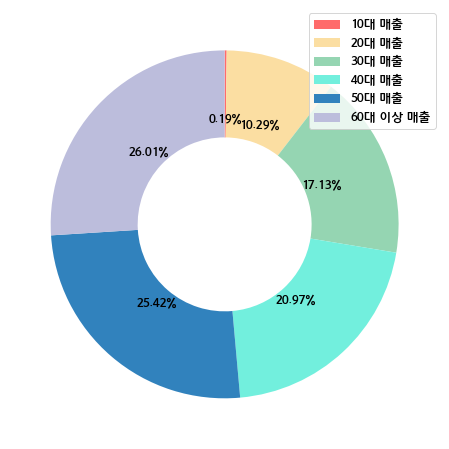

In [98]:
# '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
#         '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
#         '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
#         '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
#         '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
#         '연령대_50_매출_건수', '연령대_60_이상_매출_건수', 

print('연령대별 매출 비율')
market_infos = []
labels = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
    '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

# for market in df_necessity_final['시장이름'].unique():
for market in ['신원시장']:
    df_sales_category = df_sales[(df_sales['시장이름']==market)&(df_sales['업종'].isin(['육류판매']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum()
    market_infos.append({'values': [tuple(x) for x in df_sales_ratio[labels].values], 'name': market})

market_infos.sort(key=lambda x: x['values'][0][0] / sum(x['values'][0]))
# print(market_infos)

row_num = 1
col_num = 1

num = 0
custom_colors = ['#ff6b6b','#FBDEA2','#95d5b2','#72efdd','#3182bd','#bcbddc']

for market_info in market_infos:
    values = market_info['values'][0]
    labels = ['10대 매출', '20대 매출', '30대 매출',
    '40대 매출', '50대 매출', '60대 이상 매출']
    fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
    ax = fig.add_subplot() ## 프레임 생성

    pie = ax.pie(values, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       colors=custom_colors, 
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
    )

    plt.legend(pie[0],labels, loc='upper right') ## 범례 표시
    plt.show()


요일별 매출 비율


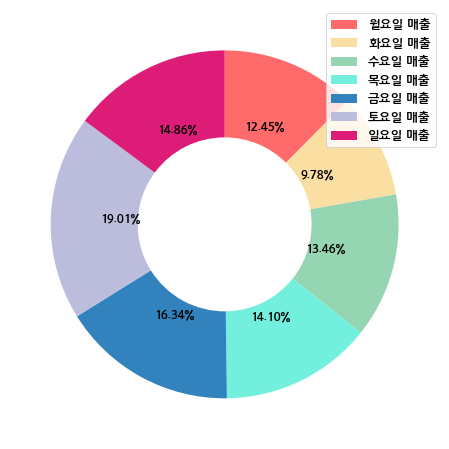

In [99]:
print('요일별 매출 비율')
market_infos = []
labels = ['월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액']

# for market in df_necessity_final['시장이름'].unique():
for market in ['신원시장']:
    df_sales_category = df_sales[(df_sales['시장이름']==market)&(df_sales['업종'].isin(['육류판매']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum()
    market_infos.append({'values': [tuple(x) for x in df_sales_ratio[labels].values], 'name': market})

market_infos.sort(key=lambda x: x['values'][0][0] / sum(x['values'][0]))
# print(market_infos)

row_num = 1
col_num = 1

num = 0
custom_colors = ['#ff6b6b','#FBDEA2','#95d5b2','#72efdd','#3182bd','#bcbddc']
custom_colors.append('#dd1c77')


for market_info in market_infos:
    values = market_info['values'][0]
    labels = ['월요일 매출', '화요일 매출', '수요일 매출',
    '목요일 매출', '금요일 매출', '토요일 매출', '일요일 매출']
    fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
    ax = fig.add_subplot() ## 프레임 생성

    pie = ax.pie(values, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       colors=custom_colors, 
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
    )

    plt.legend(pie[0],labels, loc='upper right') ## 범례 표시
    plt.show()


시간대별 매출 비율


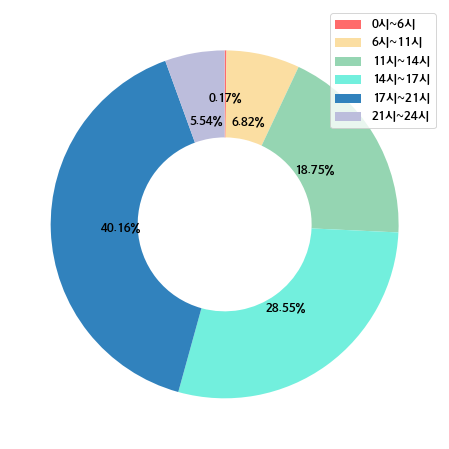

In [100]:
print('시간대별 매출 비율')
market_infos = []
labels = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']

# for market in df_necessity_final['시장이름'].unique():
for market in ['신원시장']:
    df_sales_category = df_sales[(df_sales['시장이름']==market)&(df_sales['업종'].isin(['육류판매']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum()
    market_infos.append({'values': [tuple(x) for x in df_sales_ratio[labels].values], 'name': market})

market_infos.sort(key=lambda x: x['values'][0][0] / sum(x['values'][0]))
# print(market_infos)

row_num = 1
col_num = 1

num = 0
custom_colors = ['#ff6b6b','#FBDEA2','#95d5b2','#72efdd','#3182bd','#bcbddc']

for market_info in market_infos:
    values = market_info['values'][0]
    labels = ['0시~6시', '6시~11시', '11시~14시',
    '14시~17시', '17시~21시', '21시~24시']
    fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
    ax = fig.add_subplot() ## 프레임 생성

    pie = ax.pie(values, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       colors=custom_colors, 
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) if p > 1 else '{:.2f}%\n\n\n'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
    )

    plt.legend(pie[0],labels, loc='upper right') ## 범례 표시
    plt.show()


성별별 매출 비율


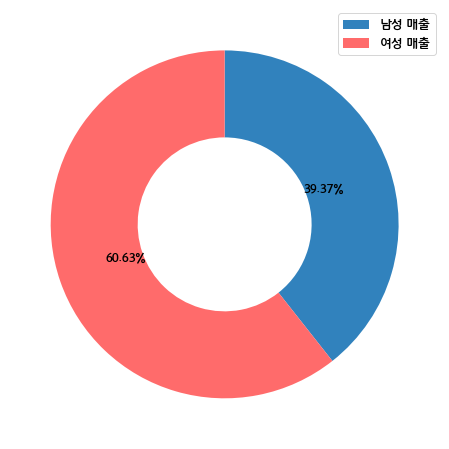

In [101]:
print('성별별 매출 비율')
market_infos = []
labels = ['남성_매출_금액',
        '여성_매출_금액']

# for market in df_necessity_final['시장이름'].unique():
for market in ['신원시장']:
    df_sales_category = df_sales[(df_sales['시장이름']==market)&(df_sales['업종'].isin(['육류판매']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum()
    market_infos.append({'values': [tuple(x) for x in df_sales_ratio[labels].values], 'name': market})

market_infos.sort(key=lambda x: x['values'][0][0] / sum(x['values'][0]))
# print(market_infos)

row_num = 1
col_num = 1

num = 0
custom_colors = ['#ff6b6b','#FBDEA2','#95d5b2','#72efdd','#3182bd','#bcbddc']
colors=[custom_colors[4],custom_colors[0]]

for market_info in market_infos:
    values = market_info['values'][0]
    labels = ['남성 매출', '여성 매출']
    fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
    ax = fig.add_subplot() ## 프레임 생성

    pie = ax.pie(values, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       colors=colors, 
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) if p > 1 else '{:.2f}%\n\n\n'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
    )

    plt.legend(pie[0],labels, loc='upper right') ## 범례 표시
    plt.show()


In [102]:
print('요일별 매출 비율')
market_infos = []
labels = ['월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액']

for market in df_necessity_final['시장이름'].unique():
    df_sales_category = df_sales[(df_sales['시장이름']==market)&(df_sales['업종'].isin(['육류판매', '수산물판매', '청과상']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum()
    market_infos.append({'values': [tuple(x) for x in df_sales_ratio[labels].values], 'name': market})

market_infos.sort(key=lambda x: x['values'][0][0] / sum(x['values'][0]))
# print(market_infos)

row_num = 2
col_num = 3
fig = make_subplots(rows=row_num, cols=col_num, specs=[[{'type':'domain'} for col in range(col_num)] for row in range(row_num)])

num = 0

for market_info in market_infos:
    values = market_info['values'][0]
    fig.add_trace(go.Pie(labels=labels, values=values, name=market_info['name'], direction='clockwise', sort=False, hole=.3),
                  num % row_num + 1, num // row_num + 1)
    num += 1
    if num >= 6:
        num = 0
        fig.show()
        fig = make_subplots(rows=row_num, cols=col_num, specs=[[{'type':'domain'} for col in range(col_num)] for row in range(row_num)])
#     fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, sort=False)])
fig.update_xaxes(categoryorder='category ascending')
fig.show()

요일별 매출 비율


In [103]:
print('시간대별 매출 비율')
market_infos = []
labels = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']
# labels.reverse()

for market in df_necessity_final['시장이름'].unique():
    df_sales_category = df_sales[(df_sales['시장이름']==market)&(df_sales['업종'].isin(['육류판매', '수산물판매', '청과상']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum()
    market_infos.append({'values': [tuple(x) for x in df_sales_ratio[labels].values], 'name': market})

market_infos.sort(key=lambda x: x['values'][0][0] / sum(x['values'][0]))
# print(market_infos)

row_num = 2
col_num = 3
fig = make_subplots(rows=row_num, cols=col_num, specs=[[{'type':'domain'} for col in range(col_num)] for row in range(row_num)])

num = 0

for market_info in market_infos:
    values = market_info['values'][0]
    fig.add_trace(go.Pie(labels=labels, values=values, name=market_info['name'], direction='clockwise', sort=False, hole=.3),
                  num % row_num + 1, num // row_num + 1)
    num += 1
    if num >= 6:
        num = 0
        fig.show()
        fig = make_subplots(rows=row_num, cols=col_num, specs=[[{'type':'domain'} for col in range(col_num)] for row in range(row_num)])
#     fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, sort=False)])
fig.update_xaxes(categoryorder='category ascending')
fig.show()

시간대별 매출 비율


In [104]:
print('성별별 매출 비율')
market_infos = []
labels = ['남성_매출_금액',
        '여성_매출_금액']
# labels.reverse()

for market in df_necessity_final['시장이름'].unique():
    df_sales_category = df_sales[(df_sales['시장이름']==market)&(df_sales['업종'].isin(['육류판매', '수산물판매', '청과상']))][[
        '시장이름', '업종', '분기당_매출_금액', '분기당_매출_건수', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
        '점포수']]
    df_sales_ratio = df_sales_category.groupby(['시장이름', '업종']).sum()
    market_infos.append({'values': [tuple(x) for x in df_sales_ratio[labels].values], 'name': market})

market_infos.sort(key=lambda x: x['values'][0][0] / sum(x['values'][0]))
# print(market_infos)

row_num = 2
col_num = 3
fig = make_subplots(rows=row_num, cols=col_num, specs=[[{'type':'domain'} for col in range(col_num)] for row in range(row_num)])

num = 0

for market_info in market_infos:
    values = market_info['values'][0]
    fig.add_trace(go.Pie(labels=labels, values=values, name=market_info['name'], direction='clockwise', sort=False, hole=.3),
                  num % row_num + 1, num // row_num + 1)
    num += 1
    if num >= 6:
        num = 0
        fig.show()
        fig = make_subplots(rows=row_num, cols=col_num, specs=[[{'type':'domain'} for col in range(col_num)] for row in range(row_num)])
#     fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, sort=False)])
fig.update_xaxes(categoryorder='category ascending')
fig.show()

성별별 매출 비율


In [105]:
def draw_old_market(category, markets_1, markets_2, m=None):
    df_old_market_1 = df_market_address[df_market_address['시장이름'].isin(markets_1)]
    df_old_market_2 = df_market_address[df_market_address['시장이름'].isin(markets_2)]
#     print(df_old_market)
    
    center = [37.55, 126.986]
    if not m:
        m = folium.Map(location=center, zoom_start=11, tiles='Open street map',  scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://tile.stamen.com/toner/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='https://tiles.wmflabs.org/osm-no-labels/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://tile.memomaps.de/tilegen/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')
#     m = folium.Map(location=center, zoom_start=11, tiles='http://a.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png', attr='oh', scrollWheelZoom=False, height='100%')

    for row in range(len(df_old_market_1)):
        radius = 5
        folium.Marker(
            location = [df_old_market_1.iloc[row]['위도'], df_old_market_1.iloc[row]['경도']],
            tooltip = df_old_market_1.iloc[row]['시장이름'],
            radius = radius,
#             color='#ff0000',
            weight=1,
            fill=True,
            fill_opacity=0.5,
            icon=folium.Icon(color = 'blue', icon='flag'),
        ).add_to(m)
        
    for row in range(len(df_old_market_2)):
        radius = 10
        folium.Marker(
            location = [df_old_market_2.iloc[row]['위도'], df_old_market_2.iloc[row]['경도']],
            tooltip = df_old_market_2.iloc[row]['시장이름'],
            radius = radius,
#             color='#0000ff',
            weight=1,
            fill=True,
            fill_opacity=0.5,
            icon=folium.Icon(color = 'red', icon='flag'),
        ).add_to(m)

    return m

In [106]:
market_infos.sort(key=lambda x: sum(x['values'][0]))
draw_old_market('육류판매', [market_info['name'] for market_info in market_infos[25:]], [market_info['name'] for market_info in market_infos[:25]], draw_sales_necessity_corr('돼지고기(생삼겹살)', '600g', '분기당_매출_금액'))

In [107]:
labels = ["US", "China", "European Union", "Russian Federation", "Brazil", "India",
          "Rest of World"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[16, 15, 12, 6, 5, 4, 42], name="GHG Emissions"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[27, 11, 25, 8, 1, 3, 25], name="CO2 Emissions"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=[16, 15, 12, 6, 5, 4, 42], name="GHG Emissions"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=[27, 11, 25, 8, 1, 3, 25], name="CO2 Emissions"),
              2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Global Emissions 1990-2011",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False),
                 dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [108]:
# item_names의 결과에 업종을 수작업으로 매핑
# category = ['수산물판매', '육류판매', '미곡판매', '청과상']
item_to_category = {
    '애호박': '청과상', 
    '오징어': '수산물판매', 
    '상추': '청과상', 
    '사과': '청과상', 
    '오이': '청과상', 
    '달걀': '육류판매', 
    '돼지고기': '육류판매', 
    '냉동참조기': '수산물판매', 
    '양파': '청과상', 
    '조기': '수산물판매', 
    '동태': '수산물판매', 
    '호박': '청과상', 
    '쇠고기': '육류판매', 
    '고등어': '수산물판매', 
    '닭고기': '육류판매', 
    '명태': '수산물판매', 
    '무': '청과상', 
    '배': '청과상', 
    '배추': '청과상',
    '삼겹살': '육류판매',
    '갈치': '수산물판매',
}
def get_sales_by_itemprice(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity['품목이름']==item
    if market:
        condition &= df_necessity['시장이름']==market
    if standard:
        condition &= df_necessity['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['가격(원)']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '가격(원)', sales_on]]
    df_sales_by_itemprice = df_sales_by_itemprice.rename(columns={'가격(원)': '가격'})
    
    # Computing IQR
    Q1 = df_sales_by_itemprice[sales_on].quantile(0.25)
    Q3 = df_sales_by_itemprice[sales_on].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    df_sales_by_itemprice = df_sales_by_itemprice.query('(@Q1 - 1.5 * @IQR) <= ' + sales_on + ' <= (@Q3 + 1.5 * @IQR)')
    
    # Computing IQR
    Q1 = df_sales_by_itemprice['가격'].quantile(0.25)
    Q3 = df_sales_by_itemprice['가격'].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    df_sales_by_itemprice = df_sales_by_itemprice.query('(@Q1 - 1.5 * @IQR) <= ' + '가격' + ' <= (@Q3 + 1.5 * @IQR)')
    
#     print(df_sales_by_itemprice.corr(method='pearson'))
    # 상관계수, p value
    # p value값이 0.05보다 낮아야 믿을만하다고 판단
#     유의수준 0.05하에서 p-value가 0.05보다 커서 귀무가설을 기각하지 못하므로
# 귀무가설 H0 : 상관계수 = 0 채택되며 이때 나오는 상관계수값은 '유의하지 않다'라고 판단한다.
    print(stats.pearsonr(df_sales_by_itemprice['가격'], df_sales_by_itemprice[sales_on]))
    fig = px.scatter(x=df_sales_by_itemprice['가격'], y=df_sales_by_itemprice[sales_on])
    fig.show()
#     return (df_necessity_itemprice_by_time, df_sales_sales_by_time, df_sales_by_itemprice)

In [109]:
def get_sales_and_itemprice_corr(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity['품목이름']==item
    if market:
        condition &= df_necessity['시장이름']==market
    if standard:
        condition &= df_necessity['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['가격(원)']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '가격(원)', sales_on]]
    df_sales_by_itemprice = df_sales_by_itemprice.rename(columns={'가격(원)': '가격'})
    
    # Computing IQR
    Q1 = df_sales_by_itemprice[sales_on].quantile(0.25)
    Q3 = df_sales_by_itemprice[sales_on].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    df_sales_by_itemprice = df_sales_by_itemprice.query('(@Q1 - 1.5 * @IQR) <= ' + sales_on + ' <= (@Q3 + 1.5 * @IQR)')
    
    # Computing IQR
    Q1 = df_sales_by_itemprice['가격'].quantile(0.25)
    Q3 = df_sales_by_itemprice['가격'].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    df_sales_by_itemprice = df_sales_by_itemprice.query('(@Q1 - 1.5 * @IQR) <= ' + '가격' + ' <= (@Q3 + 1.5 * @IQR)')
    if len(df_sales_by_itemprice['가격']) >= 2:
        return stats.pearsonr(df_sales_by_itemprice['가격'], df_sales_by_itemprice[sales_on])
    else:
        return None

In [110]:
def get_sales_and_itemprice_df(sales_on, item=None, market=None, standard=None):
    condition = True
    if item:
        condition &= df_necessity['품목이름']==item
    if market:
        condition &= df_necessity['시장이름']==market
    if standard:
        condition &= df_necessity['실판매규격']==standard
    df_necessity_itemprice_by_time = df_necessity[condition].groupby(['품목이름', '시장이름', '실판매규격', '업종', '년도', '분기'])[['가격(원)']].mean().reset_index()
    condition = True
    if item:
        category = None
        for i, c in item_to_category.items():
            if re.search('^' + i, item):
                category = c
                break
        condition &= df_sales['업종']==category
    if market:
        condition &= df_sales['시장이름']==market
    df_sales_sales_by_time = df_sales[condition]
    df_sales_by_itemprice = df_necessity_itemprice_by_time.merge(df_sales_sales_by_time, on=['시장이름', '업종', '년도', '분기'])[['시장이름', '업종', '가격(원)', sales_on, '년도', '분기']]
    df_sales_by_itemprice = df_sales_by_itemprice.rename(columns={'가격(원)': '가격'})
    
    # Computing IQR
    Q1 = df_sales_by_itemprice[sales_on].quantile(0.25)
    Q3 = df_sales_by_itemprice[sales_on].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    df_sales_by_itemprice = df_sales_by_itemprice.query('(@Q1 - 1.5 * @IQR) <= ' + sales_on + ' <= (@Q3 + 1.5 * @IQR)')
    
    # Computing IQR
    Q1 = df_sales_by_itemprice['가격'].quantile(0.25)
    Q3 = df_sales_by_itemprice['가격'].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    df_sales_by_itemprice = df_sales_by_itemprice.query('(@Q1 - 1.5 * @IQR) <= ' + '가격' + ' <= (@Q3 + 1.5 * @IQR)')
    return df_sales_by_itemprice

In [111]:
df_necessity.corr(method='pearson')

일련번호     가격(원)        년도        분기
일련번호   1.000000  0.057315  0.992248  0.252480
가격(원)  0.057315  1.000000  0.057156  0.017830
년도     0.992248  0.057156  1.000000  0.138738
분기     0.252480  0.017830  0.138738  1.000000

In [112]:
get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '화곡본동시장', '600g')

(-0.00521400088161679, 0.9798325542032608)


In [113]:
get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '노룬산골목시장', '600g')

(-0.3024402988816043, 0.14171066679029376)


In [114]:
get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)')

(0.06252887585539249, 0.05143281187558236)


In [115]:
get_sales_by_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)')

(0.1204505654331367, 2.194566640270855e-05)


In [116]:
for item in df_necessity.groupby(['품목이름']).count()[['가격(원)']].sort_values(['가격(원)'], ascending=False).index[:10]:
    print(item)
    get_sales_by_itemprice('분기당_매출_금액', item)

오이(다다기)
(0.08478332721259424, 0.00485684762271987)


쇠고기(한우,불고기)
(0.1204505654331367, 2.194566640270855e-05)


배추(2.5~3kg)
(0.16320964521047832, 3.255495971216082e-08)


달걀(10개)
(-0.017006442677213594, 0.612784104480832)


달걀(30개)
(0.014931422571282608, 0.6546259270455448)


닭고기(육계)
(0.1323592836325143, 2.8352717716630468e-06)


사과(부사, 300g)
(0.10835482733120913, 0.0003322774601072299)


돼지고기(생삼겹살)
(0.06252887585539249, 0.05143281187558236)


배(신고, 600g)
(0.09937163891519696, 0.0014847278826930204)


고등어(생물,국산)
(0.010884572568220379, 0.6873010574934918)


In [117]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133939 entries, 0 to 133938
Data columns (total 76 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   년도               133939 non-null  int64 
 1   분기               133939 non-null  int64 
 2   시장이름             133939 non-null  object
 3   업종               133939 non-null  object
 4   분기당_매출_금액        133939 non-null  int64 
 5   분기당_매출_건수        133939 non-null  int64 
 6   주중_매출_비율         133939 non-null  int64 
 7   주말_매출_비율         133939 non-null  int64 
 8   월요일_매출_비율        133939 non-null  int64 
 9   화요일_매출_비율        133939 non-null  int64 
 10  수요일_매출_비율        133939 non-null  int64 
 11  목요일_매출_비율        133939 non-null  int64 
 12  금요일_매출_비율        133939 non-null  int64 
 13  토요일_매출_비율        133939 non-null  int64 
 14  일요일_매출_비율        133939 non-null  int64 
 15  시간대_00~06_매출_비율  133939 non-null  int64 
 16  시간대_06~11_매출_비율  133939 non-null  int64 
 17  시간대_11~14_

In [118]:
for item in df_necessity.groupby(['품목이름']).count()[['가격(원)']].sort_values(['가격(원)'], ascending=False).index[:10]:
    print(item)
    get_sales_by_itemprice('연령대_60_이상_매출_금액', item)

오이(다다기)
(0.06723679530659339, 0.026711239586270197)


쇠고기(한우,불고기)
(0.23777825913802858, 5.632408808450929e-17)


배추(2.5~3kg)
(0.1463591739055517, 8.033994130950893e-07)


달걀(10개)
(-0.029384983854072483, 0.3883164927589063)


달걀(30개)
(-0.035873712989793964, 0.29026044657226424)


닭고기(육계)
(0.09744893619781855, 0.000640247763950688)


사과(부사, 300g)
(0.06773775796210971, 0.025126155739652094)


돼지고기(생삼겹살)
(0.08567163578827541, 0.007910543003834019)


배(신고, 600g)
(0.11794117246944623, 0.00016220961684739732)


고등어(생물,국산)
(0.055585604353337925, 0.041450085462283855)


In [119]:
for item in df_necessity.groupby(['품목이름']).count()[['가격(원)']].sort_values(['가격(원)'], ascending=False).index[:10]:
    print(item)
    get_sales_by_itemprice('분기당_매출_건수', item)

오이(다다기)
(0.09749558338110165, 0.0012305763344457104)


쇠고기(한우,불고기)
(0.16634378997696309, 2.8062061855589977e-09)


배추(2.5~3kg)
(0.10992218031219747, 0.00020825890721386941)


달걀(10개)
(0.0313727863998888, 0.3447564787519109)


달걀(30개)
(0.029412224449569025, 0.37602163057608357)


닭고기(육계)
(0.22768304581758195, 1.7226493848413794e-16)


사과(부사, 300g)
(0.0877431791061431, 0.0035863774963080875)


돼지고기(생삼겹살)
(0.04339475418706028, 0.17052939406664214)


배(신고, 600g)
(0.13324162051200827, 1.8714227156339648e-05)


고등어(생물,국산)
(0.037921605541118016, 0.1632909606960183)


In [120]:
c_ps = []
for market in df_necessity['시장이름'].unique():
    print(market, end='')
    c_p = get_sales_and_itemprice_corr('분기당_매출_금액', '돼지고기(생삼겹살)', market, '600g')
    print(c_p)
    if c_p and c_p[1] <= 0.15:
        c_ps.append((market, c_p[0], c_p[1]))
print('-----------')
c_ps

통인시장(0.015983973541525087, 0.9382266549004519)
방학동도깨비시장None
장위골목시장(-0.4982031184005199, 0.049524918192888324)
신창시장(0.02343556079736417, 0.9366172384736489)
마포농수산물시장(0.3235666214887432, 0.09303104623156201)
동원시장(0.46311190562327387, 0.017192594504646174)
광장시장(-0.042447044565048685, 0.8438787770103096)
사당시장(-0.013336349981610839, 0.9689566259180973)
금남시장(-0.2883182627909237, 0.2788398853340668)
뚝도시장None
후암시장None
청량리종합시장(-0.1281944285908465, 0.5325609838788506)
남문시장(nan, nan)
남구로시장(0.08722886821224309, 0.722524511023577)
신영시장(0.27981775632626726, 0.465855908193754)


C:\Users\gichan\anaconda3\envs\d8\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



고척근린시장(0.1421324736307726, 0.5176786985641602)
용문시장None
대림시장None
영등포전통시장(-0.06035942899775662, 0.7896015244563345)
망원시장(0.20704675950104817, 0.31017046127913567)
영천시장None
인왕시장(-1.0, 1.0)
신원시장(0.0592990571661897, 0.8547507642095894)
자양골목시장(0.7722417381523579, 0.00017305109543311312)
수유전통시장(0.49204641311977537, 0.010671250184298188)
경동시장(0.24758655115472442, 0.23277383728122747)
우림골목시장(0.2563670659919037, 0.1967771992731163)
송화골목시장(-0.06433568555432304, 0.7498706418534381)
대림중앙시장(-0.19215496862553, 0.3574668040174378)
목3동시장(0.3761693888086279, 0.1670028290055156)
공릉동도깨비시장(0.07193192217878921, 0.7383689690172915)
돈암제일시장(0.7460871100468371, 0.08852252862346453)
인헌시장(-0.12278151393608103, 0.5862027835255724)
남대문시장None
청담삼익시장None
현대시장(0.540147017679516, 0.636737249591626)
둔촌역전통시장(0.010484509638635287, 0.968143542732037)
서울중앙시장None
노룬산골목시장(-0.3024402988816043, 0.14171066679029376)
화곡본동시장(-0.00521400088161679, 0.9798325542032608)
방이시장(0.2463567467282019, 0.22505160574717525)
대조시장None
도곡시장(-0.0

[('장위골목시장', -0.4982031184005199, 0.049524918192888324),
 ('마포농수산물시장', 0.3235666214887432, 0.09303104623156201),
 ('동원시장', 0.46311190562327387, 0.017192594504646174),
 ('자양골목시장', 0.7722417381523579, 0.00017305109543311312),
 ('수유전통시장', 0.49204641311977537, 0.010671250184298188),
 ('돈암제일시장', 0.7460871100468371, 0.08852252862346453),
 ('노룬산골목시장', -0.3024402988816043, 0.14171066679029376)]

In [121]:
get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '동원시장', '600g')

(0.46311190562327387, 0.017192594504646174)


In [122]:
df_necessity[(df_necessity['시장이름']=='동원시장')&(df_necessity['품목이름']=='돼지고기(생삼겹살)')&(df_necessity['실판매규격']=='600g')].sort_values(['년도', '분기'], ascending=False)

일련번호  시장이름        품목이름 실판매규격  가격(원)     년도-월 자치구이름    년도  분기    업종
18756   1587858  동원시장  돼지고기(생삼겹살)  600g  12600  2020-09   중랑구  2020   3  육류판매
20315   1586159  동원시장  돼지고기(생삼겹살)  600g  12000  2020-09   중랑구  2020   3  육류판매
22159   1581385  동원시장  돼지고기(생삼겹살)  600g  13200  2020-08   중랑구  2020   3  육류판매
23354   1584715  동원시장  돼지고기(생삼겹살)  600g  12000  2020-08   중랑구  2020   3  육류판매
23393   1579754  동원시장  돼지고기(생삼겹살)  600g  13800  2020-08   중랑구  2020   3  육류판매
...         ...   ...         ...   ...    ...      ...   ...   ...  ..   ...
164128   452290  동원시장  돼지고기(생삼겹살)  600g   9800  2013-05   중랑구  2013   2  육류판매
165326   439204  동원시장  돼지고기(생삼겹살)  600g   9800  2013-04   중랑구  2013   2  육류판매
165789   424693  동원시장  돼지고기(생삼겹살)  600g   9800  2013-03   중랑구  2013   1  육류판매
166493   412442  동원시장  돼지고기(생삼겹살)  600g   9800  2013-02   중랑구  2013   1  육류판매
167229   402858  동원시장  돼지고기(생삼겹살)  600g   7800  2013-01   중랑구  2013   1  육류판매

[183 rows x 10 columns]

In [123]:
pd.set_option('display.max_rows', 200)

In [124]:
get_sales_and_itemprice_df('분기당_매출_금액', item='돼지고기(생삼겹살)', market='동원시장', standard='600g')

시장이름    업종            가격   분기당_매출_금액    년도  분기
0   동원시장  육류판매   9600.000000  3458412040  2014   1
1   동원시장  육류판매  10000.000000  3031347187  2014   2
2   동원시장  육류판매  11600.000000  3686871111  2014   3
3   동원시장  육류판매  13200.000000  3518201704  2014   4
4   동원시장  육류판매  12320.000000  3514155848  2015   1
5   동원시장  육류판매  12480.000000  2911568366  2015   2
6   동원시장  육류판매  12960.000000  3562457636  2015   3
7   동원시장  육류판매  13200.000000  3204859101  2015   4
8   동원시장  육류판매  13200.000000  3746565059  2016   1
9   동원시장  육류판매  13200.000000  3066927905  2016   2
10  동원시장  육류판매  13600.000000  3724286696  2016   3
11  동원시장  육류판매  14000.000000  3806784654  2016   4
12  동원시장  육류판매  15200.000000  4342162883  2017   1
13  동원시장  육류판매  16000.000000  3430344259  2017   2
14  동원시장  육류판매  16200.000000  3720002139  2017   3
15  동원시장  육류판매  16600.000000  4719211678  2017   4
16  동원시장  육류판매  15400.000000  4732790988  2018   1
17  동원시장  육류판매  14063.333333  3537826054  2018   2
18  동원시장  육류판매  12600.000000  4388157090  2018   3
19  동원시장  육류판매  11400.000000  4339173172  2018   4
20  동원시장  육류판매  14580.000000  4327406008  2019   1
21  동원시장  육류판매  12000.000000  3388801875  2019   2
22  동원시장  육류판매  14347.826087  4393897830  2019   3
23  동원시장  육류판매  14469.565217  5061958783  2019   4
24  동원시장  육류판매  15221.111111  5468162059  2020   1
25  동원시장  육류판매  13105.263158  5061234006  2020   2

In [125]:
get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '자양골목시장', '600g')

(0.7722417381523579, 0.00017305109543311312)


In [126]:
get_sales_and_itemprice_df('분기당_매출_금액', item='돼지고기(생삼겹살)', market='자양골목시장', standard='600g')

시장이름    업종            가격   분기당_매출_금액    년도  분기
0   자양골목시장  육류판매  11100.000000  1498182802  2014   1
1   자양골목시장  육류판매  11366.666667  1271428596  2014   2
2   자양골목시장  육류판매  11133.333333  1500266816  2014   3
3   자양골목시장  육류판매   9533.333333  1418024050  2014   4
4   자양골목시장  육류판매  11300.000000  1555552350  2015   1
5   자양골목시장  육류판매  12200.000000  1350985017  2015   2
6   자양골목시장  육류판매  13200.000000  1703987425  2015   3
7   자양골목시장  육류판매  11800.000000  1441536362  2015   4
8   자양골목시장  육류판매  11100.000000  1711704899  2016   1
9   자양골목시장  육류판매  12600.000000  1717474343  2018   4
10  자양골목시장  육류판매  12600.000000  2133913433  2019   1
11  자양골목시장  육류판매  13736.842105  1717342395  2019   2
12  자양골목시장  육류판매  14072.727273  2199017667  2019   3
13  자양골목시장  육류판매  12888.000000  1818255213  2019   4
14  자양골목시장  육류판매  12600.000000  2336722202  2020   1
15  자양골목시장  육류판매  15028.571429  2200801640  2020   2
16  자양골목시장  육류판매  16200.000000  2299037539  2020   3
17  자양골목시장  육류판매  16369.565217  2278232189  2020   4

In [127]:

get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '돈암제일시장', '600g')
get_sales_and_itemprice_df('분기당_매출_금액', item='돼지고기(생삼겹살)', market='돈암제일시장', standard='600g')

(0.7460871100468371, 0.08852252862346453)


시장이름    업종            가격   분기당_매출_금액    년도  분기
1  돈암제일시장  육류판매  13093.333333   787651140  2014   2
2  돈암제일시장  육류판매  14100.000000   960562062  2014   3
3  돈암제일시장  육류판매  14000.000000   884084119  2019   3
4  돈암제일시장  육류판매  13663.636364   938653932  2020   2
5  돈암제일시장  육류판매  14400.000000  1073609369  2020   3
6  돈암제일시장  육류판매  15000.400000   976381723  2020   4

In [128]:

get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '장위골목시장', '600g')
get_sales_and_itemprice_df('분기당_매출_금액', item='돼지고기(생삼겹살)', market='장위골목시장', standard='600g')

(-0.4982031184005199, 0.049524918192888324)


시장이름    업종            가격   분기당_매출_금액    년도  분기
0   장위골목시장  육류판매  10800.000000  1826116364  2014   1
1   장위골목시장  육류판매  13300.000000  1809508128  2014   2
2   장위골목시장  육류판매  14200.000000  2332676186  2014   3
3   장위골목시장  육류판매  12160.000000  1947160402  2014   4
4   장위골목시장  육류판매  11600.000000  2296307889  2015   1
5   장위골목시장  육류판매  13040.000000  1920345581  2015   2
6   장위골목시장  육류판매  13800.000000  2427715017  2015   3
7   장위골목시장  육류판매  12200.000000  1829708948  2015   4
8   장위골목시장  육류판매  13800.000000  2327771682  2016   1
9   장위골목시장  육류판매  15700.000000  1688524388  2018   3
10  장위골목시장  육류판매  14066.666667  1480848504  2018   4
11  장위골목시장  육류판매  13000.000000  1179671475  2019   1
12  장위골목시장  육류판매  14900.000000  1038843210  2019   4
13  장위골목시장  육류판매  16118.181818  1329185387  2020   2
14  장위골목시장  육류판매  16623.529412  1390210282  2020   3
15  장위골목시장  육류판매  16505.000000  1138575962  2020   4

In [129]:

get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '수유전통시장', '600g')
get_sales_and_itemprice_df('분기당_매출_금액', item='돼지고기(생삼겹살)', market='수유전통시장', standard='600g')

(0.49204641311977537, 0.010671250184298188)


시장이름    업종            가격   분기당_매출_금액    년도  분기
0   수유전통시장  육류판매  10133.333333  2627643065  2014   1
1   수유전통시장  육류판매  10800.000000  1900860996  2014   2
2   수유전통시장  육류판매  11666.666667  2037095645  2014   3
3   수유전통시장  육류판매  10866.666667  1815408746  2014   4
4   수유전통시장  육류판매   8966.666667  2101745699  2015   1
5   수유전통시장  육류판매  11333.333333  1493023804  2015   2
6   수유전통시장  육류판매  11666.666667  2149558063  2015   3
7   수유전통시장  육류판매  10366.666667  1573630529  2015   4
8   수유전통시장  육류판매   9600.000000  2011846029  2016   1
9   수유전통시장  육류판매   9000.000000  1371507945  2016   2
10  수유전통시장  육류판매  10200.000000  2376627827  2016   3
11  수유전통시장  육류판매  10200.000000  2289506349  2016   4
12  수유전통시장  육류판매  10800.000000  3195265398  2017   1
13  수유전통시장  육류판매  11200.000000  2195728329  2017   2
14  수유전통시장  육류판매  11866.666667  2688866085  2017   3
15  수유전통시장  육류판매  11466.666667  2928249973  2017   4
16  수유전통시장  육류판매  10500.000000  3039106162  2018   1
17  수유전통시장  육류판매   9900.000000  2103308258  2018   2
18  수유전통시장  육류판매  12900.000000  3164535673  2018   3
19  수유전통시장  육류판매  10900.000000  2429318049  2018   4
20  수유전통시장  육류판매  10800.000000  2522408824  2019   1
21  수유전통시장  육류판매  10482.352941  1747744809  2019   2
22  수유전통시장  육류판매  10770.000000  2481381910  2019   3
23  수유전통시장  육류판매  10648.000000  2422223640  2019   4
24  수유전통시장  육류판매  10600.000000  3915369021  2020   1
25  수유전통시장  육류판매  12900.000000  4218182536  2020   2

In [130]:


get_sales_by_itemprice('분기당_매출_금액', '돼지고기(생삼겹살)', '노룬산골목시장', '600g')
get_sales_and_itemprice_df('분기당_매출_금액', item='돼지고기(생삼겹살)', market='노룬산골목시장', standard='600g')

(-0.3024402988816043, 0.14171066679029376)


시장이름    업종            가격  분기당_매출_금액    년도  분기
1   노룬산골목시장  육류판매  14000.000000  601009014  2014   2
3   노룬산골목시장  육류판매  12566.666667  574572005  2014   4
4   노룬산골목시장  육류판매  11100.000000  490469811  2015   1
5   노룬산골목시장  육류판매  14500.000000  407145587  2015   2
7   노룬산골목시장  육류판매  12670.000000  457277897  2015   4
8   노룬산골목시장  육류판매  13133.333333  439653461  2016   1
9   노룬산골목시장  육류판매  13170.000000  338943890  2016   2
10  노룬산골목시장  육류판매  12000.000000  362059193  2016   3
11  노룬산골목시장  육류판매  10500.000000  353343455  2016   4
12  노룬산골목시장  육류판매  12000.000000  383388484  2017   1
13  노룬산골목시장  육류판매  14000.000000  329305206  2017   2
14  노룬산골목시장  육류판매  16000.000000  384713261  2017   3
15  노룬산골목시장  육류판매  15300.000000  417497086  2017   4
16  노룬산골목시장  육류판매  14300.000000  403245526  2018   1
17  노룬산골목시장  육류판매  16233.333333  350420532  2018   2
18  노룬산골목시장  육류판매  16566.666667  386190091  2018   3
19  노룬산골목시장  육류판매  16566.666667  339141177  2018   4
20  노룬산골목시장  육류판매  16233.333333  357434586  2019   1
21  노룬산골목시장  육류판매  16110.526316  289083038  2019   2
22  노룬산골목시장  육류판매  15309.090909  280847152  2019   3
23  노룬산골목시장  육류판매  14428.000000  292118876  2019   4
24  노룬산골목시장  육류판매  12677.777778  296359886  2020   1
25  노룬산골목시장  육류판매  16658.095238  315642904  2020   2
26  노룬산골목시장  육류판매  18233.333333  390082639  2020   3
27  노룬산골목시장  육류판매  16943.478261  363811892  2020   4

### 쇠고기

In [131]:
c_ps = []
for market in df_necessity['시장이름'].unique():
    print(market, end='')
    c_p = get_sales_and_itemprice_corr('분기당_매출_금액', '쇠고기(한우,불고기)', market, '600g')
    print(c_p)
    if c_p and c_p[1] <= 0.15:
        c_ps.append((market, c_p[0], c_p[1]))
print('-----------')
c_ps

통인시장(-0.270247205611523, 0.2941474564020518)
방학동도깨비시장(0.9099772228752152, 0.0001011719086234247)
장위골목시장(-0.2890284980082039, 0.48749608352066315)
신창시장(-0.043070733026511765, 0.912392552431949)
마포농수산물시장(0.5005289882181839, 0.20647372629369612)
동원시장(0.33036492302694875, 0.1671500947154974)
광장시장(0.1466507257820882, 0.5491112900473368)
사당시장(nan, nan)
금남시장(0.43418285038265125, 0.1820989885856565)
뚝도시장(0.5641986346956234, 0.009561919972942793)
후암시장

C:\Users\gichan\anaconda3\envs\d8\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



None
청량리종합시장(0.09726274059039061, 0.8034133562185046)
남문시장(nan, nan)
남구로시장(0.18335468730881072, 0.5130445850484595)
신영시장(0.13375388033589397, 0.5632556515995344)
고척근린시장(0.6279533180306016, 0.0013357671999099552)
용문시장None
대림시장(0.020135668287182988, 0.9559710798282979)
영등포전통시장(0.21505494452092494, 0.6090319787349439)
망원시장(0.22962631626027769, 0.5522792954805418)
영천시장(0.33098247150677723, 0.1141483017809209)
인왕시장(0.422707260939407, 0.03960083289785681)
신원시장(nan, nan)
자양골목시장(0.6489518532410211, 0.022418003484360686)
수유전통시장None
경동시장(0.7302448918313531, 0.007001398587578864)
우림골목시장(0.6708385886619772, 0.0006326656102147047)
송화골목시장(-0.842180541292211, 0.001142878986819756)
대림중앙시장(0.6287756484198529, 0.0007612145172567616)
목3동시장(-0.2505136445885, 0.6320902863017157)
공릉동도깨비시장(0.20012512212786718, 0.33748425007984273)
돈암제일시장(0.6039608411744573, 0.204211742978408)
인헌시장(-0.03214094338635326, 0.9795349153631668)
남대문시장None
청담삼익시장(-0.5178670195001234, 0.10273707752531573)
현대시장None
둔촌역전통시장(nan, nan)
서

[('방학동도깨비시장', 0.9099772228752152, 0.0001011719086234247),
 ('뚝도시장', 0.5641986346956234, 0.009561919972942793),
 ('고척근린시장', 0.6279533180306016, 0.0013357671999099552),
 ('영천시장', 0.33098247150677723, 0.1141483017809209),
 ('인왕시장', 0.422707260939407, 0.03960083289785681),
 ('자양골목시장', 0.6489518532410211, 0.022418003484360686),
 ('경동시장', 0.7302448918313531, 0.007001398587578864),
 ('우림골목시장', 0.6708385886619772, 0.0006326656102147047),
 ('송화골목시장', -0.842180541292211, 0.001142878986819756),
 ('대림중앙시장', 0.6287756484198529, 0.0007612145172567616),
 ('청담삼익시장', -0.5178670195001234, 0.10273707752531573),
 ('숭인시장', -0.5698065619031116, 0.008720785265982455)]

In [132]:
get_sales_by_itemprice('분기당_매출_금액', '쇠고기(한우,불고기)', '자양골목시장', '600g')
get_sales_and_itemprice_df('분기당_매출_금액', item='쇠고기(한우,불고기)', market='자양골목시장', standard='600g')

(0.6489518532410211, 0.022418003484360686)


시장이름    업종            가격   분기당_매출_금액    년도  분기
0   자양골목시장  육류판매  24000.000000  1972059163  2018   1
1   자양골목시장  육류판매  24000.000000  1454936736  2018   2
2   자양골목시장  육류판매  24000.000000  1994611873  2018   3
3   자양골목시장  육류판매  24000.000000  1717474343  2018   4
4   자양골목시장  육류판매  26200.000000  2133913433  2019   1
5   자양골목시장  육류판매  25800.000000  1717342395  2019   2
6   자양골목시장  육류판매  25800.000000  2199017667  2019   3
7   자양골목시장  육류판매  26208.000000  1818255213  2019   4
8   자양골목시장  육류판매  25800.000000  2336722202  2020   1
9   자양골목시장  육류판매  26342.857143  2200801640  2020   2
10  자양골목시장  육류판매  27066.666667  2299037539  2020   3
11  자양골목시장  육류판매  27339.130435  2278232189  2020   4